## **Imports**

In [434]:
import pandas as pd
import numpy as np
import importlib
from application.modeling import disbursements
from application.modeling import interest_income
from application.modeling import other_income
from application.modeling import helper
from application.modeling import depreciation
from application.modeling import expenses
from application.modeling import income_statement
from application.modeling import direct_cashflow
from application.modeling import balance_sheet
from application.modeling import statement_of_cashflows
from application.modeling import loan_book
from application.modeling import borrowings

pd.options.display.max_columns = None
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:,.2f}".format

## **Inputs**

In [435]:
start_date = "2023-10"
months_to_forecast = 15
imtt = 0.01

In [436]:
importlib.reload(helper)

<module 'application.modeling.helper' from 'c:\\Users\\HP\\Desktop\\Claxon\\Budgeting\\manage-tenants-template\\application\\modeling\\helper.py'>

In [437]:
disbursement_parameters = pd.read_csv("./data_templates/disbursement_parameters.csv", index_col=0)
disbursement_parameters = helper.match_months_to_forecast_with_df(
    df=disbursement_parameters,
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

disbursement_parameters.head()

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
AGENT_COMMISSION,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
AGENT_CONTRIBUTION_PERCENT,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
BUSINESS_ACQUISITION_PERCENT,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
CREDIT_OFFICER_COMMISSION,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
CREDIT_OFFICER_SALARY,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00


In [438]:
other_parameters = pd.read_csv("./data_templates/other_parameters.csv", index_col=0)
other_parameters = helper.match_months_to_forecast_with_df(
    df=other_parameters,
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)
other_parameters

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
NEW_INVENTORY,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
INVENTORY_USED,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NEW_INTERGROUP_RECEIVABLES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NEW_OTHER_PAYABLES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NEW_OTHER_RECEIVABLES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NEW_TRADE_PAYABLES,0.00,0.00,0.00,0.00,0.00,"15,888.40","19,217.95","32,088.24","3,425.38","5,042.59","5,990.38","10,202.77",0.00,0.00,0.00
NEW_TRADE_RECEIVABLES,0.00,"91,225.40","57,639.36","58,279.67",0.00,"27,773.92","1,728.17","2,654.09","3,425.38","5,042.59","5,990.38","10,202.77",0.00,0.00,0.00
PAYMENTS_TO_OTHER_PAYABLES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAYMENTS_TO_TRADE_PAYABLES,0.00,"13,404.72","68,786.66","80,963.15","466,687.36",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
RECEIPTS_FROM_TRADE_RECEIVABLES,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [439]:
details_of_assets = pd.read_csv("./data_templates/details_of_assets.csv")
details_of_assets.head()

,Asset ID,Acquisition Date,\r\nLife,\r\nBook Value,\r\nNet Value,Salvage Value,Method,Depreciation
0,CE-HRE-0039,15/11/2017,10,261,106.60,0,straight_line,NaN
1,CE-HRE-0040,15/11/2017,10,261,106.60,0,straight_line,NaN
2,CE-HRE-0041,15/11/2017,10,261,106.60,0,straight_line,NaN
3,CE-HRE-0042,15/11/2017,10,261,106.60,0,straight_line,NaN
4,CE-HRE-0043,15/11/2017,10,261,106.60,0,straight_line,NaN


In [440]:
details_of_long_term_borrowing = pd.read_csv("./data_templates/details_of_long_term_borrowing.csv")
details_of_long_term_borrowing.head()

,Effective Date,Institution,Nominal Amount,Interest Rate,Tenure,Repayment Frequency,Frequency,Method
0,31/12/2022,ZIMNAT LIFE ASSURANCE,376455,0.06,60,Monthly (P+I),12,reducing_balance
1,06/05/2022,MASAWARA,5613,0.06,60,Monthly (P+I),12,reducing_balance
2,31/12/2022,Grandre,160000,0.06,36,Quaterly (I+Bullet P),4,straight_line
3,31/12/2022,MINERVA,15000,0.08,36,Bullet (P+I),0,straight_line
4,10/09/2022,ZAM-CARGO,364000,0.05,36,Annually(I) Principal rollover,12,straight_line


In [441]:
details_of_short_term_borrowing = pd.read_csv("./data_templates/details_of_short_term_borrowing.csv")
details_of_short_term_borrowing.head()

,Effective Date,Institution,Nominal Amount,Interest Rate,Tenure,Repayment Frequency,Frequency,Method
0,24/04/2023,FCB,"120,383.84",0.18,3,Bullet (P+I),0,straight_line
1,02/03/2023,ZIMNAT LIFE ASSURANCE,"50,000.00",0.14,6,Monthly (P+I),12,reducing_balance
2,31/12/2022,Zimnat Life Assurance,"20,000.00",0.08,12,Annually(I) Principal rollover,1,straight_line
3,31/12/2022,Grandre,"100,000.00",0.12,12,Quaterly (I+Bullet P),4,straight_line
4,23/04/2023,FCB,"18,429.93",1.50,12,Bullet (P+I),0,straight_line


In [442]:
expenses_certain = pd.read_csv("./data_templates/expenses_certain.csv", index_col=0)

expenses_certain = helper.match_months_to_forecast_with_df(
    df=expenses_certain,
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

expenses_certain.head()

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Training,40.00,40.00,"6,840.00","1,740.00","1,540.00","2,540.00","1,540.00",40.00,"2,640.00",40.00,40.00,40.00,"1,493.67","1,498.65","1,503.65"
CILL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bonus Provision,"2,023.00","2,023.00","2,023.00","2,160.50","2,577.17","2,577.17","2,906.33","3,056.33","3,056.33","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67"
Retrenchments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Staff Welfare,"17,275.00","17,275.00","17,275.00","17,275.00","17,275.00","17,706.88","17,706.88","17,706.88","17,706.88","17,706.88","17,706.88","18,052.38","18,052.38","18,052.38","18,052.38"


In [443]:
expenses_uncertain = pd.read_csv("./data_templates/expenses_uncertain.csv", index_col=0)
expenses_uncertain = helper.match_months_to_forecast_with_df(
    df=expenses_uncertain,
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)
expenses_uncertain.head()

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
nothing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [444]:
opening_balances = pd.read_csv("./data_templates/opening_balances.csv")
opening_balances

,TRADE_RECEIVABLES,TRADE_PAYABLES,CASH_ON_HAND,ISSUED_SHARE_CAPITAL,SHARE_PREMIUM,OTHER_COMPONENTS_OF_EQUITY,TREASURY_SHARES,RETAINED_EARNINGS,INTERCOMPANY_LOANS,DEFERED_TAXATION,OTHER_RECEIVABLES,OTHER_PAYABLES,PROVISION_FOR_TAXATION,PROVISION_FOR_CREDIT_LOSS,INVESTMENT_IN_SUBSIDIARIES,INVESTMENT_IN_ASSOCIATES,INVESTMENT_PROPERTIES,EQUITY_INVESTMENTS,LONG_TERM_MONEY_MARKET_INVESTMENTS,LOANS_TO_RELATED_ENTITIES,TREASURY_SHARES.1,INTANGIBLE_ASSETS,INVENTORIES,OTHER_RECEIVABLES.1,INTERGROUP_RECEIVABLES,SHORT_TERM_MONEY_MARKET_INVESTMENTS
0,1092458,938595,"1,657,295.87",7050,110,59784,0,876511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [445]:
existing_loans = pd.read_csv("./data_templates/existing_loans.csv")
existing_loans.head()

,Loan Number,Disbursement Date,Loan Term,Loan Amount,Closing Balance,Interest Rate,Admin Fee,Credit Insurance Fee,Loan Type
0,"100,120,644,000,001",13/10/2021,60,"20,000.00","-14,769.50",0.00,0.02,0.02,B2B
1,"100,120,644,000,002",15/10/2021,60,"12,000.00","-8,855.52",0.00,0.02,0.02,B2B
2,"100,120,644,000,003",25/10/2021,60,"20,000.00","-14,708.39",0.00,0.02,0.02,B2B
3,"100,120,644,000,004",26/10/2021,60,"20,000.00","-14,703.34",0.00,0.02,0.02,B2B
4,"100,120,644,000,005",28/10/2021,60,"20,000.00","-14,693.08",0.00,0.02,0.02,B2B


## **New Disbursements**

In [446]:
new_disbursements_df  = disbursements.calculate_new_disbursements(disbursement_parameters=disbursement_parameters)
new_disbursements_df.head()

,b2b_disbursements,sme_disbursements,consumer_ssb_disbursements,consumer_pvt_disbursements,total
Oct-2023,"57,011.05","360,000.00","48,000.00","96,000.00","609,011.05"
Nov-2023,"27,480.25","384,000.00","60,000.00","120,000.00","651,480.25"
Dec-2023,"27,480.25","432,000.00","72,000.00","172,800.00","805,080.25"
Jan-2024,"34,900.00","342,000.00","80,000.00","216,000.00","808,900.00"
Feb-2024,"66,173.00","513,000.00","96,000.00","259,200.00","1,097,573.00"


### **Calculate Repayment Amount For New Disbursements**

In [447]:
monthly_repayment_new_disbursements_df = (
    interest_income.calculate_monthly_repayments_new_disbursements(
        new_disbursements_df=new_disbursements_df,
        disbursement_parameters=disbursement_parameters,
    )
)
monthly_repayment_new_disbursements_df.head()

,sme_monthly_repayment,b2b_monthly_repayment,consumer_ssb_monthly_repayment,consumer_pvt_monthly_repayment,total
Oct-2023,"81,451.18","5,779.79","8,006.34","16,012.68","111,250.00"
Nov-2023,"86,881.26","2,785.95","10,007.93","20,015.86","119,691.00"
Dec-2023,"97,741.42","2,785.95","12,009.51","28,822.83","141,359.72"
Jan-2024,"77,378.62","3,538.17","13,343.90","36,028.54","130,289.24"
Feb-2024,"116,067.93","6,708.63","16,012.68","43,234.25","182,023.50"


### **Generate Loan Schedules For New Disbursements**

In [448]:
loan_schedules_for_all_new_disbursements = (
    interest_income.generate_loan_schedules_for_all_new_disbursements(
        new_disbursements_df=new_disbursements_df,
        disbursement_parameters=disbursement_parameters,
        monthly_repayment_new_disbursements_df=monthly_repayment_new_disbursements_df,
        months_to_forecast=months_to_forecast,
    )
)
loan_schedules_for_all_new_disbursements.keys()

dict_keys(['sme_loan_schedules', 'b2b_loan_schedules', 'consumer_ssb_loan_schedules', 'consumer_pvt_loan_schedules'])

### **Capital Repayment New Disbursement**

In [449]:
capital_repayment_new_disbursements_df = interest_income.generate_capital_repayment_new_disbursements_df(
    loan_schedules_for_all_new_disbursements=loan_schedules_for_all_new_disbursements
)
capital_repayment_new_disbursements_df.head()

,sme_capital_repayments,b2b_capital_repayments,consumer_pvt_capital_repayments,consumer_ssb_capital_repayments,total
Nov-2023,"47,251.18","5,637.26","7,372.68","3,686.34","63,947.47"
Dec-2023,"102,141.30","8,368.61","17,252.08","8,626.04","136,388.03"
Jan-2024,"168,546.15","11,106.78","32,075.60","14,931.90","226,660.43"
Feb-2024,"229,446.65","14,585.46","51,550.95","22,419.67","318,002.74"
Mar-2024,"318,577.02","21,165.12","76,096.78","31,810.13","447,649.05"


### **Interest Income New Disbursements**


In [450]:
interest_income_new_disbursements_df = interest_income.generate_interest_income_new_disbursements_df(
    loan_schedules_for_all_new_disbursements=loan_schedules_for_all_new_disbursements
)

interest_income_new_disbursements_df.head()

,sme_interest_income,b2b_interest_income,consumer_pvt_interest_income,consumer_ssb_interest_income,total
Nov-2023,"34,200.00",142.53,"8,640.00","4,320.00","47,302.53"
Dec-2023,"66,191.14",197.14,"18,776.46","9,388.23","94,552.96"
Jan-2024,"97,527.71",244.91,"32,775.77","15,091.89","145,640.28"
Feb-2024,"114,005.83",304.40,"49,328.97","20,948.01","184,587.21"
Mar-2024,"140,943.40",433.37,"68,017.38","27,570.24","236,964.39"


### **Calculate Admin Fee On New Disbursements**

In [451]:
admin_fee_for_all_new_disbursements_df = other_income.calculate_admin_fee_for_all_new_disbursements(
    new_disbursements_df=new_disbursements_df,
    disbursement_parameters=disbursement_parameters,
    months_to_forecast=months_to_forecast,
)

admin_fee_for_all_new_disbursements_df.head()

,sme_admin_fee,b2b_admin_fee,consumer_ssb_admin_fee,consumer_pvt_admin_fee,total
Oct-2023,"3,000.00",114.02,240.00,480.00,"3,834.02"
Nov-2023,"6,200.00",168.98,540.00,"1,080.00","7,988.98"
Dec-2023,"9,800.00",223.94,900.00,"1,944.00","12,867.94"
Jan-2024,"12,650.00",293.74,"1,300.00","3,024.00","17,267.74"
Feb-2024,"16,925.00",426.09,"1,780.00","4,320.00","23,451.09"


### **Calculate Credit Life Insurance On New Disbursement**

In [452]:
credit_insurance_fee_for_all_new_disbursements_df = other_income.calculate_credit_insurance_fee_for_all_new_disbursements(
        new_disbursements_df=new_disbursements_df,
        disbursement_parameters=disbursement_parameters,
        months_to_forecast=months_to_forecast,
    )

credit_insurance_fee_for_all_new_disbursements_df.head()

,sme_credit_insurance_fee,b2b_credit_insurance_fee,consumer_ssb_credit_insurance_fee,consumer_pvt_credit_insurance_fee,total
Oct-2023,"1,200.00",96.92,96.00,192.00,"1,584.92"
Nov-2023,"2,480.00",143.64,216.00,432.00,"3,271.64"
Dec-2023,"3,920.00",190.35,360.00,777.60,"5,247.95"
Jan-2024,"5,060.00",249.68,520.00,"1,209.60","7,039.28"
Feb-2024,"6,770.00",362.18,712.00,"1,728.00","9,572.18"


### **Calculate For Credit Loss For New Disbursements**

In [453]:
provision_for_credit_loss_for_all_new_disbursements = (
    expenses.calculate_provision_for_credit_loss_for_all_new_disbursements(
        new_disbursements_df=new_disbursements_df, disbursement_parameters=disbursement_parameters
    )
)

provision_for_credit_loss_for_all_new_disbursements.head()

,sme_provision_for_credit_loss,b2b_provision_for_credit_loss,consumer_ssb_provision_for_credit_loss,consumer_pvt_provision_for_credit_loss,total
Oct-2023,"5,400.00",0.00,960.00,960.00,"7,320.00"
Nov-2023,"5,760.00",0.00,"1,200.00","1,200.00","8,160.00"
Dec-2023,"4,320.00",0.00,"1,440.00","1,728.00","7,488.00"
Jan-2024,"3,420.00",0.00,"1,600.00","1,728.00","6,748.00"
Feb-2024,"5,130.00",0.00,"1,920.00","2,073.60","9,123.60"


## **Existing Loans**

### **Generate Loan Schedules For Existing Loans**


In [454]:
existing_loans = helper.columns_to_snake_case(existing_loans)
# existing_loans = existing_loans.loc[existing_loans["closing_balance"] > 0]

In [455]:
existing_loans.head()

,loan_number,disbursement_date,loan_term,loan_amount,closing_balance,interest_rate,admin_fee,credit_insurance_fee,loan_type
0,"100,120,644,000,001",13/10/2021,60,"20,000.00","-14,769.50",0.00,0.02,0.02,B2B
1,"100,120,644,000,002",15/10/2021,60,"12,000.00","-8,855.52",0.00,0.02,0.02,B2B
2,"100,120,644,000,003",25/10/2021,60,"20,000.00","-14,708.39",0.00,0.02,0.02,B2B
3,"100,120,644,000,004",26/10/2021,60,"20,000.00","-14,703.34",0.00,0.02,0.02,B2B
4,"100,120,644,000,005",28/10/2021,60,"20,000.00","-14,693.08",0.00,0.02,0.02,B2B


In [456]:
existing_loans_schedules = borrowings.calculate_reducing_balance_loans_schedules(
    interest_rates=existing_loans["interest_rate"],
    effective_dates=existing_loans["disbursement_date"],
    frequencies=(existing_loans['interest_rate']*0+12),
    loan_identifiers=existing_loans["loan_number"],
    tenures=existing_loans["loan_term"],
    amounts=existing_loans["loan_amount"],
    is_interest_rate_annual=False
)

existing_loans_schedules.keys()

interest rates not divided


dict_keys(['outstanding_balance_at_start', 'capital_repayments', 'interest_payments', 'repayments'])

In [457]:
existing_loans_schedules_outstanding_balances_df = existing_loans_schedules["outstanding_balance_at_start"]

### **Capital Repayment for Existing Loans**

In [458]:
capital_repayment_existing_loans = existing_loans_schedules['capital_repayments'].sum()
capital_repayment_existing_loans

Nov-2021   152,285.66
Dec-2021   171,904.59
Jan-2022   156,150.42
Feb-2022   173,586.84
Mar-2022   187,926.76
              ...    
Feb-2020    18,446.16
Mar-2020    25,097.69
Apr-2020    28,855.63
May-2020    25,940.58
Jun-2020    28,070.43
Length: 106, dtype: float64

### **Intererest Income For Existing Loans**

In [459]:
interest_income_existing_loans = existing_loans_schedules['interest_payments'].sum()
interest_income_existing_loans

Nov-2021   50,037.52
Dec-2021   57,333.09
Jan-2022   55,629.14
Feb-2022   56,060.01
Mar-2022   55,772.51
              ...   
Feb-2020    8,864.25
Mar-2020   10,408.36
Apr-2020   10,973.54
May-2020    8,232.26
Jun-2020   10,557.03
Length: 106, dtype: float64

### **Calculate Other Income Existing Loans**

In [460]:
existing_loans = helper.columns_to_snake_case(existing_loans)
# existing_loans = existing_loans.loc[existing_loans["closing_balance"] > 0]

In [461]:
other_income_existing_loans_df = other_income.calculate_other_income_existing_loans(
    existing_loans=existing_loans,
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)
other_income_existing_loans_df.head()

,credit_insurance_fee_existing_loans,admin_fee_existing_loans,total
Nov-2021,360.26,831.82,"1,192.08"
Dec-2021,303.08,537.69,840.77
Jan-2022,303.08,537.69,840.77
Feb-2022,313.84,550.35,864.20
Mar-2022,346.66,588.97,935.63


## **Interest Income**

In [462]:
total_interest_income = interest_income.aggregate_new_and_existing_loans_interest_income(
    interest_income_new_disbursements_df=interest_income_new_disbursements_df,
    interest_income_existing_loans= interest_income_existing_loans,
    start_date= start_date, 
    months_to_forecast= months_to_forecast
)
total_interest_income.head()

Oct-2023   125,108.74
Nov-2023   146,562.64
Dec-2023   171,177.56
Jan-2024   202,040.33
Feb-2024   224,757.36
dtype: float64

## **Other Income**

In [463]:
other_income_df = other_income.aggregate_other_income(
    admin_fee_for_all_new_disbursements_df=admin_fee_for_all_new_disbursements_df,
    admin_fee_existing_loans=other_income_existing_loans_df['admin_fee_existing_loans'],
    credit_insurance_fee_existing_loans=other_income_existing_loans_df['credit_insurance_fee_existing_loans'],
    credit_insurance_fee_for_all_new_disbursements_df=credit_insurance_fee_for_all_new_disbursements_df, 
    start_date=start_date, 
    months_to_forecast=months_to_forecast
)
other_income_df.head()

,admin_fee,credit_insurance_fee,total
Oct-2023,"10,714.03","4,640.17","15,354.19"
Nov-2023,"19,014.78","8,005.81","27,020.59"
Dec-2023,"28,754.80","11,953.99","40,708.79"
Jan-2024,"37,518.57","15,506.19","53,024.76"
Feb-2024,"49,885.26","20,571.98","70,457.24"


## **Depreciation**

In [464]:
details_of_assets = helper.columns_to_snake_case(details_of_assets)
details_of_assets.head()

,asset_id,acquisition_date,life,book_value,net_value,salvage_value,method,depreciation
0,CE-HRE-0039,15/11/2017,10,261,106.60,0,straight_line,NaN
1,CE-HRE-0040,15/11/2017,10,261,106.60,0,straight_line,NaN
2,CE-HRE-0041,15/11/2017,10,261,106.60,0,straight_line,NaN
3,CE-HRE-0042,15/11/2017,10,261,106.60,0,straight_line,NaN
4,CE-HRE-0043,15/11/2017,10,261,106.60,0,straight_line,NaN


In [465]:
depreciations_and_nbvs = depreciation.calculate_depreciations_and_nbvs(
    details_of_assets=details_of_assets,
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)
depreciations_and_nbvs.keys()

dict_keys(['nbvs', 'dpns'])

## **Salaries**

In [466]:
salaries_and_pension_and_statutory_contributions_df = (
    expenses.calculate_salaries_and_pension_and_statutory_contributions(
        new_disbursements_df=new_disbursements_df,
        disbursement_parameters=disbursement_parameters,
        other_parameters = other_parameters, 
        months_to_forecast=months_to_forecast,
        start_date=start_date,
    )
)
salaries_and_pension_and_statutory_contributions_df.head()

,agent_commission,credit_officer_salaries,credit_officer_commission,other_staff_salaries,total,pensions_and_statutory_contributions
Oct-2023,"7,200.00","3,600.00","3,600.00","17,000.00","31,400.00","2,340.16"
Nov-2023,"9,000.00","3,600.00","3,840.00","17,000.00","33,440.00","2,340.16"
Dec-2023,"12,240.00","3,600.00","4,320.00","17,000.00","37,160.00","2,340.16"
Jan-2024,"14,800.00","3,600.00","3,420.00","17,000.00","38,820.00","2,340.16"
Feb-2024,"17,760.00","5,400.00","5,130.00","17,000.00","45,290.00","2,544.64"


## **Provisions**


In [467]:
provision_for_credit_loss_for_all_new_disbursements_df = (
    expenses.calculate_provision_for_credit_loss_for_all_new_disbursements(
        new_disbursements_df=new_disbursements_df,
        disbursement_parameters=disbursement_parameters,
    )
)
provision_for_credit_loss_for_all_new_disbursements_df.head()

,sme_provision_for_credit_loss,b2b_provision_for_credit_loss,consumer_ssb_provision_for_credit_loss,consumer_pvt_provision_for_credit_loss,total
Oct-2023,"5,400.00",0.00,960.00,960.00,"7,320.00"
Nov-2023,"5,760.00",0.00,"1,200.00","1,200.00","8,160.00"
Dec-2023,"4,320.00",0.00,"1,440.00","1,728.00","7,488.00"
Jan-2024,"3,420.00",0.00,"1,600.00","1,728.00","6,748.00"
Feb-2024,"5,130.00",0.00,"1,920.00","2,073.60","9,123.60"


## **Calculating Finance Costs**

In [468]:
importlib.reload(borrowings)

<module 'application.modeling.borrowings' from 'c:\\Users\\HP\\Desktop\\Claxon\\Budgeting\\manage-tenants-template\\application\\modeling\\borrowings.py'>

In [469]:
details_of_short_term_borrowings = helper.columns_to_snake_case(
    details_of_short_term_borrowing
)
details_of_long_term_borrowings = helper.columns_to_snake_case(
    details_of_long_term_borrowing
)

In [470]:
details_of_long_term_borrowing

,effective_date,institution,nominal_amount,interest_rate,tenure,repayment_frequency,frequency,method
0,31/12/2022,ZIMNAT LIFE ASSURANCE,376455,0.06,60,Monthly (P+I),12,reducing_balance
1,06/05/2022,MASAWARA,5613,0.06,60,Monthly (P+I),12,reducing_balance
2,31/12/2022,Grandre,160000,0.06,36,Quaterly (I+Bullet P),4,straight_line
3,31/12/2022,MINERVA,15000,0.08,36,Bullet (P+I),0,straight_line
4,10/09/2022,ZAM-CARGO,364000,0.05,36,Annually(I) Principal rollover,12,straight_line
5,05/04/2023,ZIMNAT LIFE ASSURANCE,30000,0.14,24,Monthly (P+I),12,reducing_balance
6,31/12/2022,ZLA-Cargo,124575,0.10,12,Annually(I) Principal rollover,1,straight_line
7,31/12/2022,ZIMNAT LION INSURANCE,50000,0.08,12,Bi-annual(I)Principal at maturity,2,straight_line
8,31/12/2022,ZIMNAT LION INSURANCE,92800,0.06,12,Bi-annual(I)Principal at maturity,2,straight_line
9,29/03/2023,BERAMASAMBA,30000,0.06,12,Bi-annual(I)Principal at maturity,2,straight_line


In [471]:
long_term_borrowings_schedules = borrowings.calculate_borrowings_schedules(details_of_long_term_borrowings)
long_term_borrowings_schedules.keys()

interests divided


dict_keys(['interest_payments', 'capital_repayments', 'outstanding_balance_at_start'])

In [472]:
details_of_short_term_borrowing

,effective_date,institution,nominal_amount,interest_rate,tenure,repayment_frequency,frequency,method
0,24/04/2023,FCB,"120,383.84",0.18,3,Bullet (P+I),0,straight_line
1,02/03/2023,ZIMNAT LIFE ASSURANCE,"50,000.00",0.14,6,Monthly (P+I),12,reducing_balance
2,31/12/2022,Zimnat Life Assurance,"20,000.00",0.08,12,Annually(I) Principal rollover,1,straight_line
3,31/12/2022,Grandre,"100,000.00",0.12,12,Quaterly (I+Bullet P),4,straight_line
4,23/04/2023,FCB,"18,429.93",1.50,12,Bullet (P+I),0,straight_line
5,17/12/2022,NURTURE,"500,000.00",0.20,12,Quaterly (I+Bullet P),4,straight_line
6,26/01/2023,NMB,"450,000.00",0.18,12,Quaterly (I+Bullet P),4,straight_line
7,24/03/2023,DANDEMUTANDE,"25,000.00",0.06,12,Bullet (P+I),0,straight_line


In [473]:
short_term_borrowings_schedules = borrowings.calculate_borrowings_schedules(details_of_short_term_borrowings)
short_term_borrowings_schedules.keys()

interests divided


dict_keys(['interest_payments', 'capital_repayments', 'outstanding_balance_at_start'])

In [474]:
short_term_borrowings_schedules_outstanding_balances_df = (
    short_term_borrowings_schedules["outstanding_balance_at_start"]
)
short_term_borrowings_schedules_interest_payments_df = short_term_borrowings_schedules[
    "interest_payments"
]
short_term_borrowings_schedules_capital_repayments_df = short_term_borrowings_schedules[
    "capital_repayments"
]

In [475]:
long_term_borrowings_schedules_outstanding_balances_df = (
    long_term_borrowings_schedules["outstanding_balance_at_start"]
)
long_term_borrowings_schedules_interest_payments_df = long_term_borrowings_schedules[
    "interest_payments"
]
long_term_borrowings_schedules_capital_repayments_df = long_term_borrowings_schedules[
    "capital_repayments"
]

In [476]:
short_term_borrowings_schedules_interest_payments_df

,Mar-2023,Apr-2023,May-2023,Jun-2023,Jul-2023,Aug-2023,Sep-2023,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024
FCB,0.00,0.00,0.00,0.00,"5,417.27",0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00
Zimnat Life Assurance,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"1,600.00",0.00,NaN,0.00
Grandre,"3,000.00",0.00,0.00,"3,000.00",0.00,0.00,"3,000.00",0.00,NaN,"3,000.00",0.00,NaN,0.00
FCB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00
NURTURE,"25,000.00",0.00,0.00,"25,000.00",0.00,0.00,"25,000.00",0.00,NaN,"25,000.00",0.00,NaN,0.00
NMB,0.00,"20,250.00",0.00,0.00,"20,250.00",0.00,0.00,"20,250.00",NaN,0.00,"20,250.00",NaN,0.00
DANDEMUTANDE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,"1,500.00"
ZIMNAT LIFE ASSURANCE,0.00,548.94,459.93,369.94,278.97,186.99,94.01,0.00,NaN,0.00,0.00,NaN,0.00


In [477]:
details_of_short_term_borrowing

,effective_date,institution,nominal_amount,interest_rate,tenure,repayment_frequency,frequency,method
0,24/04/2023,FCB,"120,383.84",0.18,3,Bullet (P+I),0,straight_line
1,02/03/2023,ZIMNAT LIFE ASSURANCE,"50,000.00",0.14,6,Monthly (P+I),12,reducing_balance
2,31/12/2022,Zimnat Life Assurance,"20,000.00",0.08,12,Annually(I) Principal rollover,1,straight_line
3,31/12/2022,Grandre,"100,000.00",0.12,12,Quaterly (I+Bullet P),4,straight_line
4,23/04/2023,FCB,"18,429.93",1.50,12,Bullet (P+I),0,straight_line
5,17/12/2022,NURTURE,"500,000.00",0.20,12,Quaterly (I+Bullet P),4,straight_line
6,26/01/2023,NMB,"450,000.00",0.18,12,Quaterly (I+Bullet P),4,straight_line
7,24/03/2023,DANDEMUTANDE,"25,000.00",0.06,12,Bullet (P+I),0,straight_line


In [478]:
capital_repayment_borrowings_df = pd.concat(
    [
        long_term_borrowings_schedules["capital_repayments"],
        short_term_borrowings_schedules["capital_repayments"],
    ],
    
).fillna(0)

capital_repayment_borrowings_df.loc['total'] = capital_repayment_borrowings_df.sum()

In [479]:
finance_costs_df = pd.concat(
    [
        long_term_borrowings_schedules["interest_payments"],
        short_term_borrowings_schedules["interest_payments"],
    ],
).fillna(0)

finance_costs_df.loc["total"] = finance_costs_df.sum()
finance_costs_df

,Jun-2022,Jul-2022,Aug-2022,Sep-2022,Oct-2022,Nov-2022,Dec-2022,Jan-2023,Feb-2023,Mar-2023,Apr-2023,May-2023,Jun-2023,Jul-2023,Aug-2023,Sep-2023,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024,Jan-2025,Feb-2025,Mar-2025,Apr-2025,May-2025,Jun-2025,Jul-2025,Aug-2025,Sep-2025,Oct-2025,Nov-2025,Dec-2025,Jan-2026,Feb-2026,Mar-2026,Apr-2026,May-2026,Jun-2026,Jul-2026,Aug-2026,Sep-2026,Oct-2026,Nov-2026,Dec-2026,Jan-2027,Feb-2027,Mar-2027,Apr-2027,May-2027,Jun-2027,Jul-2027,Aug-2027,Sep-2027,Oct-2027,Nov-2027
Grandre,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,"2,400.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MINERVA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,600.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZAM-CARGO,0.00,0.00,0.00,0.00,"1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67","1,516.67",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZLA-Cargo,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"12,457.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZIMNAT LION INSURANCE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,000.00",0.00,0.00,0.00,0.00,0.00,"2,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZIMNAT LION INSURANCE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,784.00",0.00,0.00,0.00,0.00,0.00,"2,784.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BERAMASAMBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,900.00,0.00,0.00,0.00,0.00,0.00,900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZIMNAT LIFE ASSURANCE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,832.41","1,806.04","1,779.54","1,752.91","1,726.16","1,699.27","1,672.25","1,645.10","1,617.82","1,590.40","1,562.85","1,535.17","1,507.35","1,479.40","1,451.31","1,423.08","1,394.72","1,366.22","1,337.58","1,308.80","1,279.88","1,250.82","1,221.61","1,192.27","1,162.78","1,133.15","1,103.38","1,073.46","1,043.39","1,013.18",982.82,952.32,921.66,890.86,859.90,828.80,797.54,766.13,734.57,702.86,670.99,638.96,606.78,574.45,541.95,509.30,476.49,443.52,410.39,377.09,343.64,310.02,276.24,242.29,208.18,173.90,139.46,104.85,70.07
MASAWARA,27.32,26.93,26.53,26.14,25.74,25.34,24.93,24.53,24.12,23.71,23.30,22.89,22.4

## **Income Statement**

In [480]:
income_statement_df = income_statement.generate_income_statement_template(
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)
income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Revenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pensions & Statutory Contributions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus Provision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Calculate Variable Expenses**

In [481]:
uncertain_expenses = expenses.calculate_uncertain_expenses(
    expenses_uncertain=expenses_uncertain,
    other_parameters=other_parameters,
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)
uncertain_expenses

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
nothing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **Calculate Change In Provision For Credit Loss**

In [482]:
change_in_provision_for_credit_loss = (
    expenses.calculate_change_in_provision_for_credit_loss(
        provision_for_credit_loss=provision_for_credit_loss_for_all_new_disbursements['total'],
        provision_for_credit_loss_opening_balances=float(
            opening_balances["PROVISION_FOR_CREDIT_LOSS"].iat[0]
        ),
        start_date=start_date, 
        months_to_forecast=months_to_forecast
    )
)

change_in_provision_for_credit_loss.head()

Oct-2023   7,320.00
Nov-2023     840.00
Dec-2023    -672.00
Jan-2024    -740.00
Feb-2024   2,375.60
Name: total, dtype: float64

### **Calculate Business Acquisition**

In [483]:
business_acquisition = expenses.calculate_business_acqusition(
    business_acquisition_percent=disbursement_parameters.loc['BUSINESS_ACQUISITION_PERCENT'],
    agent_contribution_percent=disbursement_parameters.loc['AGENT_CONTRIBUTION_PERCENT'],
    consumer_ssb_disbursements=new_disbursements_df['consumer_ssb_disbursements'],
    consumer_pvt_disbursements=new_disbursements_df['consumer_pvt_disbursements'],
)
business_acquisition.head()

Oct-2023   1,728.00
Nov-2023   2,160.00
Dec-2023   2,678.40
Jan-2024   3,048.00
Feb-2024   3,657.60
dtype: float64

### **Insert Revenue**

In [484]:
income_statement_df = income_statement.insert_revenue(
    income_statement=income_statement_df,
    interest_income=total_interest_income,
    other_income=other_income_df['total'],
)

income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Total Revenue,"140,462.93","173,583.23","211,886.35","255,065.09","295,214.60","353,954.22","405,339.44","469,826.22","546,926.05","627,607.09","731,470.60","819,644.70","893,561.13","951,768.12","998,538.92"
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pensions & Statutory Contributions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus Provision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Insert Static And Variable Inputs**

In [485]:
income_statement_df = income_statement.insert_expenses(
    income_statement=income_statement_df,
    expenses_certain=expenses_certain,
    uncertain_expenses=uncertain_expenses,
)

income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Total Revenue,"140,462.93","173,583.23","211,886.35","255,065.09","295,214.60","353,954.22","405,339.44","469,826.22","546,926.05","627,607.09","731,470.60","819,644.70","893,561.13","951,768.12","998,538.92"
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pensions & Statutory Contributions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Training,40.00,40.00,"6,840.00","1,740.00","1,540.00","2,540.00","1,540.00",40.00,"2,640.00",40.00,40.00,40.00,"1,493.67","1,498.65","1,503.65"
Bonus Provision,"2,023.00","2,023.00","2,023.00","2,160.50","2,577.17","2,577.17","2,906.33","3,056.33","3,056.33","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67"


### **Insert Salaries and Pensions And Statutory Contributions**

In [486]:
income_statement_df = income_statement.insert_salaries_and_pensions_and_statutory_contributions(
    income_statement=income_statement_df,
    salaries_and_pension_and_statutory_contributions_df=salaries_and_pension_and_statutory_contributions_df,
)

income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Total Revenue,"140,462.93","173,583.23","211,886.35","255,065.09","295,214.60","353,954.22","405,339.44","469,826.22","546,926.05","627,607.09","731,470.60","819,644.70","893,561.13","951,768.12","998,538.92"
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,"31,400.00","33,440.00","37,160.00","38,820.00","45,290.00","47,180.00","57,500.00","62,350.00","64,600.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00"
Pensions & Statutory Contributions,"2,340.16","2,340.16","2,340.16","2,340.16","2,544.64","2,544.64","2,749.12","2,885.44","2,885.44","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08"
Training,40.00,40.00,"6,840.00","1,740.00","1,540.00","2,540.00","1,540.00",40.00,"2,640.00",40.00,40.00,40.00,"1,493.67","1,498.65","1,503.65"
Bonus Provision,"2,023.00","2,023.00","2,023.00","2,160.50","2,577.17","2,577.17","2,906.33","3,056.33","3,056.33","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67"


### **Insert Depreciation**

In [487]:
income_statement_df = income_statement.insert_depreciation(
    income_statement=income_statement_df,
    depreciation=depreciations_and_nbvs["dpns"]["total"],
)

### **Insert Change in Provision For Credit Loss**

In [488]:
income_statement_df = income_statement.insert_credit_loss_provision(
    income_statement=income_statement_df, 
    change_in_provision_for_credit_loss=change_in_provision_for_credit_loss,
)

In [489]:
provision_for_credit_loss = provision_for_credit_loss_for_all_new_disbursements["total"]
provision_for_credit_loss.head()

Oct-2023   7,320.00
Nov-2023   8,160.00
Dec-2023   7,488.00
Jan-2024   6,748.00
Feb-2024   9,123.60
Name: total, dtype: float64

### **Insert Business Acquisition**

In [490]:
income_statement_df = income_statement.insert_business_acquisition(
    income_statement=income_statement_df, business_acquisition=business_acquisition
)

### **Aggregations**

In [491]:
income_statement_df = income_statement.aggregate_staff_costs(income_statement_df)
income_statement_df = income_statement.aggregate_travel_and_entertainment(income_statement_df)
income_statement_df = income_statement.aggregate_marketing_and_public_relations(income_statement_df)
income_statement_df = income_statement.aggregate_office_costs(income_statement_df)
income_statement_df = income_statement.aggregate_professional_fees(income_statement_df)
income_statement_df = income_statement.aggregate_communication_costs(income_statement_df)
income_statement_df = income_statement.aggregate_motor_vehicle_costs(income_statement_df)
income_statement_df = income_statement.aggregate_other_costs(income_statement_df)
income_statement_df = income_statement.aggregate_investment_income(income_statement_df)
income_statement_df = income_statement.aggregate_finance_costs(income_statement_df)

### **Calculating Total Expenses and EBIDTA**

In [492]:
income_statement_df = income_statement.calculate_total_expenses(income_statement_df)
income_statement_df = income_statement.calculate_ebidta(income_statement_df)

### **Insert Finance Cost**

In [493]:
income_statement_df.loc["Finance Costs"] = finance_costs_df.loc["total"]
income_statement_df.loc["Finance Costs"] = income_statement_df.loc[
    "Finance Costs"
].fillna(0)
income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Total Revenue,"140,462.93","173,583.23","211,886.35","255,065.09","295,214.60","353,954.22","405,339.44","469,826.22","546,926.05","627,607.09","731,470.60","819,644.70","893,561.13","951,768.12","998,538.92"
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,"31,400.00","33,440.00","37,160.00","38,820.00","45,290.00","47,180.00","57,500.00","62,350.00","64,600.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00"
Pensions & Statutory Contributions,"2,340.16","2,340.16","2,340.16","2,340.16","2,544.64","2,544.64","2,749.12","2,885.44","2,885.44","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08"
Training,40.00,40.00,"6,840.00","1,740.00","1,540.00","2,540.00","1,540.00",40.00,"2,640.00",40.00,40.00,40.00,"1,493.67","1,498.65","1,503.65"
Bonus Provision,"2,023.00","2,023.00","2,023.00","2,160.50","2,577.17","2,577.17","2,906.33","3,056.33","3,056.33","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67"


### **Aggregate Finance Cost**

In [494]:
income_statement_df = income_statement.aggregate_finance_costs(income_statement_df)

### **Calculate Profit Before Tax**

In [495]:
income_statement_df = income_statement.calculate_profit_before_tax(income_statement_df)

### **Calculate Tax**

In [496]:
income_statement_df = income_statement.calculate_tax(
    income_statement=income_statement_df, tax_rate=other_parameters.loc["TAX_RATE"]
)
income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Total Revenue,"140,462.93","173,583.23","211,886.35","255,065.09","295,214.60","353,954.22","405,339.44","469,826.22","546,926.05","627,607.09","731,470.60","819,644.70","893,561.13","951,768.12","998,538.92"
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,"31,400.00","33,440.00","37,160.00","38,820.00","45,290.00","47,180.00","57,500.00","62,350.00","64,600.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00"
Pensions & Statutory Contributions,"2,340.16","2,340.16","2,340.16","2,340.16","2,544.64","2,544.64","2,749.12","2,885.44","2,885.44","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08"
Training,40.00,40.00,"6,840.00","1,740.00","1,540.00","2,540.00","1,540.00",40.00,"2,640.00",40.00,40.00,40.00,"1,493.67","1,498.65","1,503.65"
Bonus Provision,"2,023.00","2,023.00","2,023.00","2,160.50","2,577.17","2,577.17","2,906.33","3,056.33","3,056.33","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67"


## **Direct Cashflow**

In [497]:
direct_cashflow_df = direct_cashflow.generate_direct_cashflow_template(
    start_date=start_date, months_to_forecast=months_to_forecast
)

direct_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Term Borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital Repayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Receipts From Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Of Other Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue Of Equity And Intercompany Loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Insert Available Direct Cashflow Items**

#### **From Parameters**

In [498]:
direct_cashflow_df.loc[
    "Receipts From Receivables"
] = helper.change_period_index_to_strftime(
    helper.add_series(
        [
            other_parameters.loc["RECEIPTS_FROM_OTHER_RECEIVABLES"],
            other_parameters.loc["RECEIPTS_FROM_TRADE_RECEIVABLES"],
            other_parameters.loc["RECEIPTS_FROM_INTERGROUP_RECEIVABLES"],
        ]
    )
)

direct_cashflow_df.loc[
    "Purchase Of Inventory"
] = helper.change_period_index_to_strftime(other_parameters.loc["NEW_INVENTORY"])
direct_cashflow_df.loc[
    "Payments To Payables"
] = -helper.change_period_index_to_strftime(
    helper.add_series(
        [
            other_parameters.loc["PAYMENTS_TO_TRADE_PAYABLES"],
            other_parameters.loc["PAYMENTS_TO_OTHER_PAYABLES"],
        ]
    )
)

direct_cashflow_df.loc["Dividend Paid"] = -helper.change_period_index_to_strftime(
    other_parameters.loc["DIVIDEND_PAID"]
)

#### **From Calculations/Income Statement**

In [499]:
direct_cashflow_df.loc['Interest Income'] = income_statement_df.loc['Interest Income']
direct_cashflow_df.loc['Other Income'] = income_statement_df.loc['Other Income']
direct_cashflow_df.loc['Interest Expense'] = -income_statement_df.loc['Finance Costs']
direct_cashflow_df.loc['Disbursements'] = -helper.change_period_index_to_strftime(new_disbursements_df['total'])

In [500]:
direct_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Term Borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital Repayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Receipts From Receivables,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sale Of Other Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue Of Equity And Intercompany Loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Equity and Intercompany Loans**

In [501]:
direct_cashflow_df = direct_cashflow.add_equity_and_intercompany_loans(
    other_parameters=other_parameters, direct_cashflow_df=direct_cashflow_df
)

### **Other Assets**


In [502]:
direct_cashflow_df = direct_cashflow.add_other_assets(
    other_parameters=other_parameters, direct_cashflow_df=direct_cashflow_df
)

### **Tax Paid**

In [503]:
tax_schedule = direct_cashflow.generate_tax_schedule(
    taxation=income_statement_df.loc["Taxation"],
    opening_balance=opening_balances["DEFERED_TAXATION"].iat[0],
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)

tax_schedule

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,0,0.00,"10,717.26",0.00,"27,545.18","67,368.62",0.00,"64,300.11","141,369.99",0.00,"115,857.02","257,365.75",0.00,"180,179.05","374,875.88"
Tax Charged,0,"10,717.26","2,764.17","27,545.18","39,823.44","48,084.58","64,300.11","77,069.88","90,676.32","115,857.02","141,508.72","162,243.52","180,179.05","194,696.84","204,811.87"
Tax Paid,-0.00,-0.00,"-13,481.42",-0.00,-0.00,"-115,453.21",-0.00,-0.00,"-232,046.32",-0.00,-0.00,"-419,609.27",-0.00,-0.00,"-579,687.75"
Closing Balance,0.00,"10,717.26",0.00,"27,545.18","67,368.62",0.00,"64,300.11","141,369.99",0.00,"115,857.02","257,365.75",0.00,"180,179.05","374,875.88",0.00


In [504]:
direct_cashflow_df.loc['Tax Paid'] = tax_schedule.loc['Tax Paid']

### **Calculate Operating Expenses**

In [505]:
operating_expenses = direct_cashflow.calculate_operating_expenses(income_statement=income_statement_df)
operating_expenses.head()

Oct-2023   137,792.72
Nov-2023   135,778.77
Dec-2023   149,532.48
Jan-2024   133,427.24
Feb-2024   130,870.15
dtype: object

### **Insert Operating Expenses**

In [506]:
direct_cashflow_df.loc['Operating Expenses']  = -operating_expenses
direct_cashflow_df


,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Term Borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital Repayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Receipts From Receivables,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sale Of Other Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Issue Of Equity And Intercompany Loans,0.00,0.00,0.00,0.00,0.00,0.00,61.99,98.62,775.08,0.00,0.00,0.00,0.00,0.00,0.00


### **Calculate Capital Expenses**

In [507]:
capital_expenses = direct_cashflow.calculate_capital_expenses(
    details_of_assets=details_of_assets,
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)

capital_expenses.head()

Oct-2023        0
Nov-2023        0
Dec-2023        0
Jan-2024    41540
Feb-2024        0
Name: book_value, dtype: int64

### **Insert Capital Expenses**

In [508]:
direct_cashflow_df.loc['Capital Expenses'] = -capital_expenses

### **Calculate Direct Cashflow Borrowings**

In [509]:
long_and_short_term_borrowing_df = (
    direct_cashflow.calculate_long_and_short_term_borrowing_for_direct_cashflow(
        details_of_long_term_borrowing=details_of_long_term_borrowing,
        details_of_short_term_borrowing=details_of_short_term_borrowing,
        start_date=start_date,
        months_to_forecast=months_to_forecast,
    )
)

long_and_short_term_borrowing_df

,long_term_borrowing,short_term_borrowing,total
Oct-2023,0,0.00,0.00
Nov-2023,0,0.00,0.00
Dec-2023,0,0.00,0.00
Jan-2024,0,0.00,0.00
Feb-2024,0,0.00,0.00
Mar-2024,0,0.00,0.00
Apr-2024,0,0.00,0.00
May-2024,0,0.00,0.00
Jun-2024,0,0.00,0.00
Jul-2024,0,0.00,0.00


### **Insert Direct Cashflow Borrowing**

In [510]:
direct_cashflow_df.loc['Short Term Borrowing'] = long_and_short_term_borrowing_df['short_term_borrowing']
direct_cashflow_df.loc['Long Term Borrowing'] = long_and_short_term_borrowing_df['long_term_borrowing']

In [511]:
direct_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capital Repayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Receipts From Receivables,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sale Of Other Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Issue Of Equity And Intercompany Loans,0.00,0.00,0.00,0.00,0.00,0.00,61.99,98.62,775.08,0.00,0.00,0.00,0.00,0.00,0.00


### **Calculate Capital Repayments**

In [512]:
capital_repayment = helper.add_series(
[existing_loans_schedules['capital_repayments'].sum()
    , capital_repayment_new_disbursements_df['total']]
)

capital_repayment.loc[helper.generate_columns(start_date,months_to_forecast)].head()

Oct-2023   336,958.19
Nov-2023   366,595.98
Dec-2023   413,498.98
Jan-2024   458,220.47
Feb-2024   500,726.42
dtype: float64

### **Insert Capital Repayment**

In [513]:
direct_cashflow_df.loc['Capital Repayment'] = capital_repayment

### **Calculate Capital Repayments on Borrowings**


In [514]:
capital_repayment_borrowings_df

,Jun-2022,Jul-2022,Aug-2022,Sep-2022,Oct-2022,Nov-2022,Dec-2022,Jan-2023,Feb-2023,Mar-2023,Apr-2023,May-2023,Jun-2023,Jul-2023,Aug-2023,Sep-2023,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024,Jan-2025,Feb-2025,Mar-2025,Apr-2025,May-2025,Jun-2025,Jul-2025,Aug-2025,Sep-2025,Oct-2025,Nov-2025,Dec-2025,Jan-2026,Feb-2026,Mar-2026,Apr-2026,May-2026,Jun-2026,Jul-2026,Aug-2026,Sep-2026,Oct-2026,Nov-2026,Dec-2026,Jan-2027,Feb-2027,Mar-2027,Apr-2027,May-2027,Jun-2027,Jul-2027,Aug-2027,Sep-2027,Oct-2027,Nov-2027
Grandre,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"160,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MINERVA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"15,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZAM-CARGO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"364,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZLA-Cargo,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"124,575.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZIMNAT LION INSURANCE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"50,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZIMNAT LION INSURANCE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"92,800.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BERAMASAMBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"30,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZIMNAT LIFE ASSURANCE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"5,417.73","5,444.10","5,470.60","5,497.23","5,523.98","5,550.87","5,577.89","5,605.04","5,632.32","5,659.74","5,687.29","5,714.97","5,742.79","5,770.74","5,798.83","5,827.06","5,855.42","5,883.92","5,912.56","5,941.34","5,970.26","5,999.32","6,028.53","6,057.87","6,087.36","6,116.99","6,146.76","6,176.68","6,206.75","6,236.96","6,267.32","6,297.82","6,328.48","6,359.28","6,390.24","6,421.34","6,452.60","6,484.01","6,515.57","6,547.28","6,579.15","6,611.18","6,643.36","6,675.69","6,708.19","6,740.84","6,773.65","6,806.62","6,839.76","6,873.05","6,906.50","6,940.12","6,973.90","7,007.85","7,041.96","7,076.24","7,110.68","7,145.29","7,180.07"
MASAWARA,80.78,81.17,81.57,81.96,82.36,82.76,83.17,83.57,83.98,84.39,84.80,85.21,85.63,86.04,86.46,86.88,87.31,87.73,88.16,88.59,89.02,89.45,89.89,90.32,90.76,91.21,91.65,92.10,92.54,92.99,93.45,93.90,94.36,94.82,95.28,95.74,96.21,96.68,97.15,97

### **Insert Capital Repayment on New Borrowings**

In [515]:
direct_cashflow_df.loc[
    "Capital Repayment On Borrowings"
] = -capital_repayment_borrowings_df.loc["total"]

direct_cashflow_df.loc["Capital Repayment On Borrowings"] = direct_cashflow_df.loc[
    "Capital Repayment On Borrowings"
].fillna(0)

### **Calculate Direct Cashflow Totals**

In [516]:
direct_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capital Repayment,"336,958.19","366,595.98","413,498.98","458,220.47","500,726.42","593,047.96","705,541.81","781,801.18","877,547.76","939,746.45","1,092,513.94","1,209,319.95","1,322,188.52","1,427,114.57","1,496,539.10"
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Receipts From Receivables,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sale Of Other Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Issue Of Equity And Intercompany Loans,0.00,0.00,0.00,0.00,0.00,0.00,61.99,98.62,775.08,0.00,0.00,0.00,0.00,0.00,0.00


In [517]:
direct_cashflow_df.loc["Total Cash Inflows"] = direct_cashflow_df.iloc[
    direct_cashflow_df.index.get_loc("CASH INFLOWS")
    + 1 : direct_cashflow_df.index.get_loc("Total Cash Inflows")
].sum()


direct_cashflow_df.loc["Total Cash Outflows"] = direct_cashflow_df.iloc[
    direct_cashflow_df.index.get_loc("CASH OUTFLOWS")
    + 1 : direct_cashflow_df.index.get_loc("Total Cash Outflows")
].sum()

direct_cashflow_df.loc["Net Increase/Decrease In Cash"] = (
    direct_cashflow_df.loc["Total Cash Inflows"]
    + direct_cashflow_df.loc["Total Cash Outflows"]
)

### **Calculate Opening and Closing Balances**

In [518]:
depreciations_and_nbvs['dpns'].sum(axis = 1).head()

Oct-2023   16,374.93
Nov-2023   16,374.93
Dec-2023   15,375.03
Jan-2024   15,083.79
Feb-2024   14,434.99
dtype: float64

In [519]:
depreciations_and_nbvs['nbvs'].sum(axis = 1).head()

Oct-2023   1,071,584.87
Nov-2023   1,055,209.94
Dec-2023   1,039,834.92
Jan-2024   1,024,751.14
Feb-2024   1,010,316.11
dtype: float64

In [520]:
direct_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capital Repayment,"336,958.19","366,595.98","413,498.98","458,220.47","500,726.42","593,047.96","705,541.81","781,801.18","877,547.76","939,746.45","1,092,513.94","1,209,319.95","1,322,188.52","1,427,114.57","1,496,539.10"
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Receipts From Receivables,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sale Of Other Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Issue Of Equity And Intercompany Loans,0.00,0.00,0.00,0.00,0.00,0.00,61.99,98.62,775.08,0.00,0.00,0.00,0.00,0.00,0.00


In [521]:
tax_schedule

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,0,0.00,"10,717.26",0.00,"27,545.18","67,368.62",0.00,"64,300.11","141,369.99",0.00,"115,857.02","257,365.75",0.00,"180,179.05","374,875.88"
Tax Charged,0,"10,717.26","2,764.17","27,545.18","39,823.44","48,084.58","64,300.11","77,069.88","90,676.32","115,857.02","141,508.72","162,243.52","180,179.05","194,696.84","204,811.87"
Tax Paid,-0.00,-0.00,"-13,481.42",-0.00,-0.00,"-115,453.21",-0.00,-0.00,"-232,046.32",-0.00,-0.00,"-419,609.27",-0.00,-0.00,"-579,687.75"
Closing Balance,0.00,"10,717.26",0.00,"27,545.18","67,368.62",0.00,"64,300.11","141,369.99",0.00,"115,857.02","257,365.75",0.00,"180,179.05","374,875.88",0.00


In [522]:
direct_cashflow_df= direct_cashflow.calculate_opening_and_closing_balances_for_direct_cashflows(
direct_cashflow=direct_cashflow_df, 
cash_on_hand_opening_balance= opening_balances['CASH_ON_HAND'].iat[0]
)

direct_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
DIRECT_CASHFLOW_STATEMENT,,,,,,,,,,,,,,,
CASH INFLOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Short Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Borrowing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Capital Repayment,"336,958.19","366,595.98","413,498.98","458,220.47","500,726.42","593,047.96","705,541.81","781,801.18","877,547.76","939,746.45","1,092,513.94","1,209,319.95","1,322,188.52","1,427,114.57","1,496,539.10"
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Receipts From Receivables,0.00,0.00,0.00,0.00,"1,187,638.92",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sale Of Other Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Issue Of Equity And Intercompany Loans,0.00,0.00,0.00,0.00,0.00,0.00,61.99,98.62,775.08,0.00,0.00,0.00,0.00,0.00,0.00


In [523]:
direct_cashflow_yearly_df = direct_cashflow.calculate_direct_cashflow_yearly(
    direct_cashflow_df = direct_cashflow_df, opening_balances = opening_balances
)
direct_cashflow_yearly_df

,2023,2024
DIRECT_CASHFLOW_STATEMENT,,
CASH INFLOWS,0.00,0.00
Short Term Borrowing,0.00,0.00
Long Term Borrowing,0.00,0.00
Capital Repayment,"1,117,053.15","11,404,308.11"
Interest Income,"442,848.94","5,539,964.63"
Other Income,"83,083.57","1,808,951.56"
Receipts From Receivables,0.00,"1,187,638.92"
Sale Of Other Assets,0.00,0.00
Issue Of Equity And Intercompany Loans,0.00,935.69


### **Calculate IMTT (2% Tax)**

In [524]:
income_statement_df.loc['2% Taxation']  = -direct_cashflow_df.loc['Total Cash Outflows']*imtt

## **Calculate Profit and Loss for the Period**


In [525]:
income_statement_df = income_statement.calculate_profit_or_loss_for_period(income_statement_df)
income_statement_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
INCOME_STATEMENT,,,,,,,,,,,,,,,
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Other Income,"15,354.19","27,020.59","40,708.79","53,024.76","70,457.24","88,573.17","102,015.20","119,214.43","136,302.29","161,842.48","182,171.26","201,748.92","218,910.42","231,523.72","243,167.66"
Total Revenue,"140,462.93","173,583.23","211,886.35","255,065.09","295,214.60","353,954.22","405,339.44","469,826.22","546,926.05","627,607.09","731,470.60","819,644.70","893,561.13","951,768.12","998,538.92"
MANAGEMENT EXPENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STAFF COSTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salaries,"31,400.00","33,440.00","37,160.00","38,820.00","45,290.00","47,180.00","57,500.00","62,350.00","64,600.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00","70,550.00"
Pensions & Statutory Contributions,"2,340.16","2,340.16","2,340.16","2,340.16","2,544.64","2,544.64","2,749.12","2,885.44","2,885.44","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08","3,158.08"
Training,40.00,40.00,"6,840.00","1,740.00","1,540.00","2,540.00","1,540.00",40.00,"2,640.00",40.00,40.00,40.00,"1,493.67","1,498.65","1,503.65"
Bonus Provision,"2,023.00","2,023.00","2,023.00","2,160.50","2,577.17","2,577.17","2,906.33","3,056.33","3,056.33","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67","3,189.67"


## **Loan Book**

In [526]:
loan_book_df = loan_book.generate_loan_book_template(
    start_date=start_date, months_to_forecast=months_to_forecast
)
loan_book_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Disbursements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Repayments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closing Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Insert Loan Book Items**

In [527]:
capital_repayment_existing_loans = existing_loans_schedules['capital_repayments'].sum()
capital_repayment_existing_loans.loc[helper.generate_columns(start_date,12)]

Oct-2023   336,958.19
Nov-2023   302,648.51
Dec-2023   277,110.95
Jan-2024   231,560.04
Feb-2024   182,723.68
Mar-2024   145,398.90
Apr-2024   115,369.44
May-2024   110,003.63
Jun-2024   101,291.49
Jul-2024    52,480.21
Aug-2024    41,121.27
Sep-2024    35,428.78
dtype: float64

In [528]:
total_capital_repayments = loan_book.aggregate_new_and_existing_loans_capital_repayments(
    capital_repayments_new_disbursements_df = capital_repayment_new_disbursements_df,
    capital_repayments_existing_loans = capital_repayment_existing_loans,
    start_date = start_date,
    months_to_forecast = months_to_forecast,
)

total_capital_repayments.head()

Oct-2023   336,958.19
Nov-2023   366,595.98
Dec-2023   413,498.98
Jan-2024   458,220.47
Feb-2024   500,726.42
dtype: float64

In [529]:

loan_book_df = loan_book.insert_loan_book_items(
    loan_book=loan_book_df,
    opening_balance_on_loan_book=existing_loans_schedules_outstanding_balances_df.sum()[
        pd.Timestamp(start_date).strftime("%b-%Y")
    ],
    total_interest_income=total_interest_income,
    total_capital_repayments=total_capital_repayments,
    disbursements=helper.change_period_index_to_strftime(new_disbursements_df["total"]),
)

loan_book_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,"2,325,544.68",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New Disbursements,"609,011.05","651,480.25","805,080.25","808,900.00","1,097,573.00","1,141,909.25","1,396,650.00","1,588,680.00","1,735,000.00","2,095,000.00","2,035,000.00","2,035,000.00","2,035,000.00","2,035,000.00","2,035,000.00"
Repayments,"-462,066.92","-513,158.62","-584,676.54","-660,260.80","-725,483.78","-858,429.01","-1,008,866.05","-1,132,412.96","-1,288,171.52","-1,405,511.05","-1,641,813.27","-1,827,215.73","-1,996,839.23","-2,147,358.97","-2,251,910.36"
Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Closing Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Calculate Opening and Closing Balances for Loan Book**

In [530]:
loan_book_df = helper.calculate_opening_and_closing_balances(loan_book_df)
loan_book_df.to_csv("loan_book_df.csv")

In [531]:
loan_book_yearly_df = loan_book.calculate_loan_book_yearly(loan_book=loan_book_df)
loan_book_yearly_df

,2023,2024
Opening Balance,"7,805,624.03","8,754,142.43"
New Disbursements,"2,065,571.55","20,038,712.25"
Repayments,"-1,559,902.09","-16,944,272.74"
Interest Income,"442,848.94","5,539,964.63"
Closing Balance,"8,754,142.43","17,388,546.57"


## **Balance Sheet**


In [532]:
balance_sheet_df = balance_sheet.generate_balance_sheet_template(
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)

balance_sheet_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_FINANCIAL_POSITION,,,,,,,,,,,,,,,
ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NON CURRENT ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Plant And Equipment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment In Subsidiaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment In Associates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment Properties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equity Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Term Money Market Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Insert Available Balance Sheet Items**

In [533]:
depreciations_and_nbvs.keys()

dict_keys(['nbvs', 'dpns'])

In [534]:
balance_sheet_df.loc["Property Plant And Equipment"] = depreciations_and_nbvs["nbvs"][
    "total"
]

balance_sheet_df.loc["Loan Book"] = loan_book_df.loc["Closing Balance"]

balance_sheet_df.loc["Cash On Hand"] = direct_cashflow_df.loc["Closing Balance"]

balance_sheet_df.loc[
    "Provisions"
] = provision_for_credit_loss_for_all_new_disbursements["total"]


balance_sheet_df.loc["Provision For Taxation"] = helper.change_period_index_to_strftime(
    other_parameters.loc["PROVISION_FOR_TAX"]
)

balance_sheet_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_FINANCIAL_POSITION,,,,,,,,,,,,,,,
ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NON CURRENT ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Plant And Equipment,"535,792.44","527,604.97","519,917.46","512,375.57","505,158.05","497,940.59","490,784.49","483,628.39","476,472.30","469,316.20","462,213.09","455,142.33","448,075.02","441,007.71","433,987.62"
Intangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment In Subsidiaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment In Associates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment Properties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equity Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Term Money Market Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Generate Borrowings Schedules**

In [535]:
short_term_borrowings_schedules['outstanding_balance_at_start']

,Dec-2022,Jan-2023,Feb-2023,Mar-2023,Apr-2023,May-2023,Jun-2023,Jul-2023,Aug-2023,Sep-2023,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024
FCB,0.00,0.00,0.00,0.00,"120,383.84","120,383.84","120,383.84",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Zimnat Life Assurance,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00",0.00,0.00,0.00
Grandre,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00",0.00,0.00,0.00
FCB,0.00,0.00,0.00,0.00,"18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93"
NURTURE,"500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00",0.00,0.00,0.00
NMB,0.00,"450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00",0.00,0.00
DANDEMUTANDE,0.00,0.00,0.00,"25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00"
ZIMNAT LIFE ASSURANCE,0.00,0.00,0.00,0.00,"50,000.00","41,892.48","33,695.95","25,409.43","17,031.93","8,562.46",0.00,0.00,0.00,0.00,0.00


In [536]:
short_term_borrowings_schedules_outstanding_balances_df

,Dec-2022,Jan-2023,Feb-2023,Mar-2023,Apr-2023,May-2023,Jun-2023,Jul-2023,Aug-2023,Sep-2023,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024
FCB,0.00,0.00,0.00,0.00,"120,383.84","120,383.84","120,383.84",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Zimnat Life Assurance,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00",0.00,0.00,0.00
Grandre,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00",0.00,0.00,0.00
FCB,0.00,0.00,0.00,0.00,"18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93","18,429.93"
NURTURE,"500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00","500,000.00",0.00,0.00,0.00
NMB,0.00,"450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00","450,000.00",0.00,0.00
DANDEMUTANDE,0.00,0.00,0.00,"25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00","25,000.00"
ZIMNAT LIFE ASSURANCE,0.00,0.00,0.00,0.00,"50,000.00","41,892.48","33,695.95","25,409.43","17,031.93","8,562.46",0.00,0.00,0.00,0.00,0.00


In [537]:
short_term_borrowings_schedules['capital_repayments']

,Apr-2023,May-2023,Jun-2023,Jul-2023,Aug-2023,Sep-2023,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024
FCB,0.00,0.00,0.00,"120,383.84",0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00
Zimnat Life Assurance,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,"20,000.00",0.00,NaN,0.00
Grandre,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,"100,000.00",0.00,NaN,0.00
FCB,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,NaN,0.00
NURTURE,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,"500,000.00",0.00,NaN,0.00
NMB,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,"450,000.00",NaN,0.00
DANDEMUTANDE,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,NaN,"25,000.00"
ZIMNAT LIFE ASSURANCE,"8,107.52","8,196.53","8,286.52","8,377.50","8,469.47","8,562.46",NaN,NaN,0.00,0.00,NaN,0.00


In [538]:
short_term_borrowings_schedules_outstanding_balances_df.sum()

Dec-2022     620,000.00
Jan-2023   1,070,000.00
Feb-2023   1,070,000.00
Mar-2023   1,095,000.00
Apr-2023   1,283,813.77
May-2023   1,275,706.25
Jun-2023   1,267,509.72
Jul-2023   1,138,839.36
Aug-2023   1,130,461.86
Sep-2023   1,121,992.39
Oct-2023   1,113,429.93
Nov-2023   1,113,429.93
Dec-2023     493,429.93
Jan-2024      43,429.93
Feb-2024      43,429.93
dtype: float64

In [539]:
short_term_loans_schedules = balance_sheet.calculate_short_term_loans_schedules(
    long_and_short_term_borrowing_df=long_and_short_term_borrowing_df,
    capital_repayment_on_borrowings_df=short_term_borrowings_schedules[
        "capital_repayments"
    ].sum(),
    opening_balance_on_short_term_loans=short_term_borrowings_schedules_outstanding_balances_df.sum()[
        (pd.Timestamp(start_date) - pd.DateOffset(months=1)).strftime("%b-%Y")
    ],
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)

short_term_loans_schedules

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,"1,121,992.39","1,121,992.39","1,121,992.39","501,992.39","51,992.39","51,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39"
Borrowings,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Repayments,-0.00,-0.00,"-620,000.00","-450,000.00",-0.00,"-25,000.00",0,0,0,0,0,0,0,0,0
Closing Balance,"1,121,992.39","1,121,992.39","501,992.39","51,992.39","51,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39","26,992.39"


In [540]:
long_term_loans_schedules = balance_sheet.calculate_long_term_loans_schedules(
    long_and_short_term_borrowing_df=long_and_short_term_borrowing_df,
    capital_repayment_on_borrowings_df=long_term_borrowings_schedules[
        "capital_repayments"
    ].sum(),
    opening_balance_on_long_term_loans=long_term_borrowings_schedules_outstanding_balances_df.sum()[
        pd.Timestamp(start_date).strftime("%b-%Y")
    ],
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)

long_term_loans_schedules

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,"1,191,763.72","1,184,855.63","1,177,906.83","903,542.03","896,510.95","889,438.32","852,323.84","845,167.25","837,968.24","830,726.53","823,441.84","816,113.85","808,742.28","801,326.83","793,867.19"
Borrowings,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Repayments,"-6,908.08","-6,948.81","-274,364.80","-7,031.08","-7,072.63","-37,114.47","-7,156.60","-7,199.01","-7,241.71","-7,284.70","-7,327.99","-7,371.57","-7,415.45","-7,459.64","-7,504.12"
Closing Balance,"1,184,855.63","1,177,906.83","903,542.03","896,510.95","889,438.32","852,323.84","845,167.25","837,968.24","830,726.53","823,441.84","816,113.85","808,742.28","801,326.83","793,867.19","786,363.07"


### **Insert Borrowings and Loans**


In [541]:
balance_sheet_df.loc["Loans"] = long_term_borrowings_schedules_outstanding_balances_df.sum()
balance_sheet_df.loc["Borrowings"]  = short_term_borrowings_schedules_outstanding_balances_df.sum()
balance_sheet_df.loc["Borrowings"].fillna(0, inplace=True)
balance_sheet_df.loc["Loans"].fillna(0,inplace=True)

### **Generate Receivables and Payables Schedules**

In [542]:
trade_receivables_schedule = balance_sheet.generate_receivables_schedule(
    opening_receivables=opening_balances["TRADE_RECEIVABLES"].iat[0],
    receipts_from_receivables=other_parameters.loc["RECEIPTS_FROM_TRADE_RECEIVABLES"],
    new_receivables=other_parameters.loc["NEW_TRADE_RECEIVABLES"],
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

other_receivables_schedule = balance_sheet.generate_receivables_schedule(
    opening_receivables=opening_balances["OTHER_RECEIVABLES"].iat[0],
    receipts_from_receivables=other_parameters.loc["RECEIPTS_FROM_OTHER_RECEIVABLES"],
    new_receivables=other_parameters.loc["NEW_OTHER_RECEIVABLES"],
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

intergroup_receivables_schedule = balance_sheet.generate_receivables_schedule(
    opening_receivables=opening_balances["INTERGROUP_RECEIVABLES"].iat[0],
    receipts_from_receivables=other_parameters.loc["RECEIPTS_FROM_INTERGROUP_RECEIVABLES"],
    new_receivables=other_parameters.loc["NEW_INTERGROUP_RECEIVABLES"],
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

trade_payables_schedule = balance_sheet.generate_payables_schedule(
    opening_payables=opening_balances["TRADE_PAYABLES"].iat[0],
    payments_to_payables=other_parameters.loc["PAYMENTS_TO_TRADE_PAYABLES"],
    new_payables=other_parameters.loc["NEW_TRADE_PAYABLES"],
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

other_payables_schedule = balance_sheet.generate_payables_schedule(
    opening_payables=opening_balances["OTHER_PAYABLES"].iat[0],
    payments_to_payables=other_parameters.loc["PAYMENTS_TO_OTHER_PAYABLES"],
    new_payables=other_parameters.loc["NEW_OTHER_PAYABLES"],
    months_to_forecast=months_to_forecast,
    start_date=start_date,
)

balance_sheet_df.loc["Trade Payables"] = trade_payables_schedule.loc["Closing Balance"]
balance_sheet_df.loc["Other Payables"] = other_payables_schedule.loc["Closing Balance"]

balance_sheet_df.loc["Trade Receivables"] = trade_receivables_schedule.loc[
    "Closing Balance"
]

balance_sheet_df.loc["Other Receivables"] = other_receivables_schedule.loc[
    "Closing Balance"
]

balance_sheet_df.loc["Intergroup Receivables"] = intergroup_receivables_schedule.loc[
    "Closing Balance"
]


balance_sheet_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_FINANCIAL_POSITION,,,,,,,,,,,,,,,
ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NON CURRENT ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Plant And Equipment,"535,792.44","527,604.97","519,917.46","512,375.57","505,158.05","497,940.59","490,784.49","483,628.39","476,472.30","469,316.20","462,213.09","455,142.33","448,075.02","441,007.71","433,987.62"
Intangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment In Subsidiaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment In Associates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investment Properties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equity Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Long Term Money Market Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [543]:
balance_sheet_df.loc['Deferred Taxation'] = tax_schedule.loc['Closing Balance']

In [544]:
inventories_schedule = balance_sheet.generate_inventories_schedule(
    opening_inventories=opening_balances["INVENTORIES"].iat[0],
    new_inventories=other_parameters.loc["NEW_INVENTORY"],
    inventories_used=other_parameters.loc["INVENTORY_USED"],
    start_date=start_date,
    months_to_forecast=months_to_forecast,
)

inventories_schedule

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Opening Balance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
New Inventories,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inventories Used,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Closing Balance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [545]:
balance_sheet_df.loc['Inventories']  = inventories_schedule.loc['Closing Balance']

### **Equity and Intercompany Loans**


In [546]:
balance_sheet_df.loc["Issued Share Capital"] = helper.change_period_index_to_strftime(
    other_parameters.loc["SHARE_CAPITAL"].cumsum()
    + opening_balances["ISSUED_SHARE_CAPITAL"].iat[0]
)

balance_sheet_df.loc["Intercompany Loans"] = helper.change_period_index_to_strftime(
    other_parameters.loc["INTERCOMPANY_LOANS"].cumsum()
    + opening_balances["INTERCOMPANY_LOANS"].iat[0]
)


balance_sheet_df.loc["Share Premium"] = helper.change_period_index_to_strftime(
    other_parameters.loc["SHARE_PREMIUM"].cumsum() + opening_balances["SHARE_PREMIUM"].iat[0]
)

balance_sheet_df.loc[
    "Other Components Of Equity"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["OTHER_COMPONENTS_OF_EQUITY"].cumsum()
    + opening_balances["OTHER_COMPONENTS_OF_EQUITY"].iat[0]
)

balance_sheet_df.loc["Treasury Shares"] = helper.change_period_index_to_strftime(
    other_parameters.loc["TREASURY_SHARES"].cumsum()
    + opening_balances["TREASURY_SHARES"].iat[0]
)

balance_sheet_df.loc["Retained Earnings"] = (
    income_statement_df.loc["PROFIT/(LOSS) FOR PERIOD"]
    - helper.change_period_index_to_strftime(other_parameters.loc["DIVIDEND_PAID"])
).cumsum()

balance_sheet_df.loc["Capital And Reserves"] = balance_sheet_df.loc[
    "Issued Share Capital":"Retained Earnings"
].sum()

### **Other Assets**

In [547]:
balance_sheet_df.loc["Intangible Assets"] = helper.change_period_index_to_strftime(
    other_parameters.loc["INTANGIBLE_ASSETS"].cumsum()
    + opening_balances["INTANGIBLE_ASSETS"].iat[0]
)

balance_sheet_df.loc[
    "Investment In Subsidiaries"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["INVESTMENT_IN_SUBSIDIARIES"].cumsum()
    + opening_balances["INVESTMENT_IN_SUBSIDIARIES"].iat[0]
)

balance_sheet_df.loc[
    "Investment In Associates"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["INVESTMENT_IN_ASSOCIATES"].cumsum()
    + opening_balances["INVESTMENT_IN_ASSOCIATES"].iat[0]
)

balance_sheet_df.loc["Investment Properties"] = helper.change_period_index_to_strftime(
    other_parameters.loc["INVESTMENT_PROPERTIES"].cumsum()
    + opening_balances["INVESTMENT_PROPERTIES"].iat[0]
)

balance_sheet_df.loc["Equity Investments"] = helper.change_period_index_to_strftime(
    other_parameters.loc["EQUITY_INVESTMENTS"].cumsum()
    + opening_balances["EQUITY_INVESTMENTS"].iat[0]
)

balance_sheet_df.loc[
    "Long Term Money Market Investments"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["LONG_TERM_MONEY_MARKET_INVESTMENTS"].cumsum()
    + opening_balances["LONG_TERM_MONEY_MARKET_INVESTMENTS"].iat[0]
)

balance_sheet_df.loc[
    "Short Term Money Market Investments"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["SHORT_TERM_MONEY_MARKET_INVESTMENTS"].cumsum()
    + opening_balances["SHORT_TERM_MONEY_MARKET_INVESTMENTS"].iat[0]
)

balance_sheet_df.loc[
    "Loans To Related Entities"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["LOANS_TO_RELATED_ENTITIES"].cumsum()
    + opening_balances["LOANS_TO_RELATED_ENTITIES"].iat[0]
)

In [548]:
balance_sheet_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_FINANCIAL_POSITION,,,,,,,,,,,,,,,
ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NON CURRENT ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Plant And Equipment,"535,792.44","527,604.97","519,917.46","512,375.57","505,158.05","497,940.59","490,784.49","483,628.39","476,472.30","469,316.20","462,213.09","455,142.33","448,075.02","441,007.71","433,987.62"
Intangible Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment In Subsidiaries,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment In Associates,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment Properties,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Equity Investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Money Market Investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **Calculate Totals**


In [549]:
balance_sheet_df = balance_sheet.sum_financial_statements_totals(balance_sheet_df)
balance_sheet_df = balance_sheet.calculate_final_balances(balance_sheet_df=balance_sheet_df)
balance_sheet_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_FINANCIAL_POSITION,,,,,,,,,,,,,,,
ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NON CURRENT ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Plant And Equipment,"535,792.44","527,604.97","519,917.46","512,375.57","505,158.05","497,940.59","490,784.49","483,628.39","476,472.30","469,316.20","462,213.09","455,142.33","448,075.02","441,007.71","433,987.62"
Intangible Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment In Subsidiaries,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment In Associates,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment Properties,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Equity Investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Money Market Investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [550]:
balance_sheet_yearly_df = balance_sheet.calculate_balance_sheet_yearly(
    balance_sheet_df=balance_sheet_df
)

In [551]:
balance_sheet_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_FINANCIAL_POSITION,,,,,,,,,,,,,,,
ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NON CURRENT ASSETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Plant And Equipment,"535,792.44","527,604.97","519,917.46","512,375.57","505,158.05","497,940.59","490,784.49","483,628.39","476,472.30","469,316.20","462,213.09","455,142.33","448,075.02","441,007.71","433,987.62"
Intangible Assets,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment In Subsidiaries,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment In Associates,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Investment Properties,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Equity Investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Long Term Money Market Investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## **Indirect Cashflow**

In [552]:
statement_of_cashflow_df = (
    statement_of_cashflows.generate_statement_of_cashflow_template(
        start_date, months_to_forecast
    )
)

### **Insert Available Balances**

In [553]:
statement_of_cashflow_df.loc["Profit/(loss) Per I/S"] = income_statement_df.loc[
    "PROFIT/(LOSS) FOR PERIOD"
]

statement_of_cashflow_df.loc["Depreciation"] = income_statement_df.loc["Depreciation"]
statement_of_cashflow_df.loc["Dividend Paid"] = -helper.change_period_index_to_strftime(
    other_parameters.loc["DIVIDEND_PAID"]
)
statement_of_cashflow_df.loc[
    "Treasury Movements"
] = helper.change_period_index_to_strftime(other_parameters.loc["TREASURY_MOVEMENTS"])
statement_of_cashflow_df.loc[
    "Interest Expense Accrued"
] = helper.change_period_index_to_strftime(
    other_parameters.loc["INTEREST_EXPENSE_ACCRUED"]
)
statement_of_cashflow_df.loc[
    "Other Non-Cash Items"
] = helper.change_period_index_to_strftime(other_parameters.loc["OTHER_NON_CASH_ITEMS"])

statement_of_cashflow_df.loc["Interest Paid"] = -finance_costs_df.loc["total"]

statement_of_cashflow_df.loc["Tax Paid"] = tax_schedule.loc["Tax Paid"]

statement_of_cashflow_df.loc[
    "Repayment Of Borrowings"
] = -capital_repayment_borrowings_df.loc["total"]
statement_of_cashflow_df.loc["Purchase Of Fixed Assets"] = capital_expenses
statement_of_cashflow_df.loc["Increase/(Decrease) In Short Term Borrowings"] = (
    short_term_loans_schedules.loc["Closing Balance"]
    - short_term_loans_schedules.loc["Opening Balance"]
)
statement_of_cashflow_df.loc["Increase/(Decrease) In Long Term Borrowings"] = (
    long_term_loans_schedules.loc["Closing Balance"]
    - long_term_loans_schedules.loc["Opening Balance"]
)
statement_of_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_CASHFLOWS,,,,,,,,,,,,,,,
Profit/(loss) Per I/S,"-7,968.14","24,051.43","-11,536.28","67,192.61","102,434.24","128,452.31","175,968.33","213,480.44","250,366.32","324,742.70","402,430.57","460,402.40","517,890.56","561,833.57","586,414.07"
Treasury Movements,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Adjustments For:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depreciation,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Interest Expense Accrued,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Other Non-Cash Items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cash From Operations Before WC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Working Capital Movements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Increase)/Decrease In Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [554]:
statement_of_cashflow_df.loc[
    "Cash From Operations Before WC"
] = statement_of_cashflow_df.iloc[
    1 : statement_of_cashflow_df.index.get_loc("Cash From Operations Before WC")
].sum()

In [555]:

statement_of_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_CASHFLOWS,,,,,,,,,,,,,,,
Profit/(loss) Per I/S,"-7,968.14","24,051.43","-11,536.28","67,192.61","102,434.24","128,452.31","175,968.33","213,480.44","250,366.32","324,742.70","402,430.57","460,402.40","517,890.56","561,833.57","586,414.07"
Treasury Movements,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Adjustments For:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depreciation,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Interest Expense Accrued,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Other Non-Cash Items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cash From Operations Before WC,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Working Capital Movements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Increase)/Decrease In Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Working Capital Movements**

In [556]:
change_in_receivables = (
    other_receivables_schedule.loc["Closing Balance"]
    - other_receivables_schedule.loc["Opening Balance"]
    + trade_receivables_schedule.loc["Closing Balance"]
    - trade_receivables_schedule.loc["Opening Balance"]
    + intergroup_receivables_schedule.loc["Closing Balance"]
    - intergroup_receivables_schedule.loc["Opening Balance"]
)

change_in_receivables.head()

Oct-2023            0.00
Nov-2023       91,225.40
Dec-2023       57,639.36
Jan-2024       58,279.67
Feb-2024   -1,187,638.92
dtype: float64

In [557]:
change_in_payables = (
    trade_payables_schedule.loc["Closing Balance"]
    - trade_payables_schedule.loc["Opening Balance"]
    + other_payables_schedule.loc["Closing Balance"]
    - other_payables_schedule.loc["Opening Balance"]
)
change_in_payables.head()

Oct-2023          0.00
Nov-2023    -13,404.72
Dec-2023    -68,786.66
Jan-2024    -80,963.15
Feb-2024   -466,687.36
dtype: float64

In [558]:
change_in_loan_book_principle = loan_book_df.loc["New Disbursements":"Repayments"].sum()
change_in_loan_book_principle.head()

Oct-2023   146,944.13
Nov-2023   138,321.63
Dec-2023   220,403.71
Jan-2024   148,639.20
Feb-2024   372,089.22
dtype: object

In [559]:
change_in_loan_book_interest = loan_book_df.loc['Interest Income']
change_in_loan_book_interest.head()

Oct-2023   125,108.74
Nov-2023   146,562.64
Dec-2023   171,177.56
Jan-2024   202,040.33
Feb-2024   224,757.36
Name: Interest Income, dtype: object

In [560]:
borrowings_schedule = long_term_loans_schedules + short_term_loans_schedules
change_in_borrowings = borrowings_schedule.loc['Closing Balance'] - borrowings_schedule.loc['Opening Balance']
change_in_borrowings.head()

Oct-2023     -6,908.08
Nov-2023     -6,948.81
Dec-2023   -894,364.80
Jan-2024   -457,031.08
Feb-2024     -7,072.63
dtype: object

In [561]:
statement_of_cashflow_df.loc['(Increase)/Decrease In Receivables'] = change_in_receivables
statement_of_cashflow_df.loc['Increase/(Decrease) In Payables'] = change_in_payables
statement_of_cashflow_df.loc['(Increase)/Decrease In Loan Book (Principle)'] = change_in_loan_book_principle
statement_of_cashflow_df.loc['(Increase)/Decrease In Loan Book (Interest)'] = change_in_loan_book_interest
statement_of_cashflow_df.loc['Increase/(Decrease) In Borrowings'] = change_in_borrowings

In [562]:
statement_of_cashflow_df.loc["Cash From Operations After WC"] = (
    statement_of_cashflow_df.loc["Cash From Operations Before WC"]
    + statement_of_cashflow_df.iloc[
        statement_of_cashflow_df.index.get_loc("Working Capital Movements")
        + 1 : statement_of_cashflow_df.index.get_loc("Cash From Operations After WC")
    ].sum()
)

In [563]:
statement_of_cashflow_df.loc[
    "Net Cash Flow From Operations"
] = statement_of_cashflow_df.loc["Cash From Operations After WC":"Tax Paid"].sum()

In [564]:
statement_of_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_CASHFLOWS,,,,,,,,,,,,,,,
Profit/(loss) Per I/S,"-7,968.14","24,051.43","-11,536.28","67,192.61","102,434.24","128,452.31","175,968.33","213,480.44","250,366.32","324,742.70","402,430.57","460,402.40","517,890.56","561,833.57","586,414.07"
Treasury Movements,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Adjustments For:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depreciation,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Interest Expense Accrued,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Other Non-Cash Items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cash From Operations Before WC,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Working Capital Movements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Increase)/Decrease In Receivables,0.00,"91,225.40","57,639.36","58,279.67","-1,187,638.92","27,773.92","1,728.17","2,654.09","3,425.38","5,042.59","5,990.38","10,202.77",0.00,0.00,0.00


### **Calculating Totals**

In [565]:
statement_of_cashflow_df = balance_sheet.sum_financial_statements_totals(statement_of_cashflow_df)


statement_of_cashflow_df.loc['Net Increase/(Decrease) In Cash'] = (
    statement_of_cashflow_df.loc["Net Cash Flow From Operations"]
    + statement_of_cashflow_df.loc["Cash Flow From Investing Activities"]
    + statement_of_cashflow_df.loc["Cash Flow From Financing Activities"]
)
statement_of_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_CASHFLOWS,,,,,,,,,,,,,,,
Profit/(loss) Per I/S,"-7,968.14","24,051.43","-11,536.28","67,192.61","102,434.24","128,452.31","175,968.33","213,480.44","250,366.32","324,742.70","402,430.57","460,402.40","517,890.56","561,833.57","586,414.07"
Treasury Movements,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Adjustments For:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depreciation,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Interest Expense Accrued,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Other Non-Cash Items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cash From Operations Before WC,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Working Capital Movements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Increase)/Decrease In Receivables,0.00,"91,225.40","57,639.36","58,279.67","-1,187,638.92","27,773.92","1,728.17","2,654.09","3,425.38","5,042.59","5,990.38","10,202.77",0.00,0.00,0.00


### **Calculating Cash at End and Beginning of Period**

In [566]:
statement_of_cashflow_df = (
    statement_of_cashflows.calculate_cash_at_end_and_beginning_of_period(
        statement_of_cashflow_df=statement_of_cashflow_df,
        opening_balances=opening_balances,
    )
)

statement_of_cashflow_df

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
STATEMENT_OF_CASHFLOWS,,,,,,,,,,,,,,,
Profit/(loss) Per I/S,"-7,968.14","24,051.43","-11,536.28","67,192.61","102,434.24","128,452.31","175,968.33","213,480.44","250,366.32","324,742.70","402,430.57","460,402.40","517,890.56","561,833.57","586,414.07"
Treasury Movements,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Adjustments For:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depreciation,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Interest Expense Accrued,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Other Non-Cash Items,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cash From Operations Before WC,"8,187.46","8,187.46","7,687.51","7,541.90","7,217.50","7,156.10","7,156.10","7,156.10","7,156.10","7,103.11","7,103.11","7,070.75","7,067.23","7,056.75","7,017.63"
Working Capital Movements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Increase)/Decrease In Receivables,0.00,"91,225.40","57,639.36","58,279.67","-1,187,638.92","27,773.92","1,728.17","2,654.09","3,425.38","5,042.59","5,990.38","10,202.77",0.00,0.00,0.00


In [567]:
statement_of_cashflow_yearly_df = (
    statement_of_cashflows.calculate_statement_of_cashflow_yearly_df(
        statement_of_cashflow_df=statement_of_cashflow_df,
        opening_balances=opening_balances,
    )
)

statement_of_cashflow_yearly_df

,2023,2024
STATEMENT_OF_CASHFLOWS,,
Profit/(loss) Per I/S,"4,547.01","3,791,608.10"
Treasury Movements,0.00,0.00
Adjustments For:,0.00,0.00
Depreciation,"24,062.44","85,802.37"
Interest Expense Accrued,0.00,0.00
Other Non-Cash Items,0.00,0.00
Cash From Operations Before WC,"24,062.44","85,802.37"
Working Capital Movements,0.00,0.00
(Increase)/Decrease In Receivables,"148,864.76","-1,072,541.96"


In [568]:
balance_sheet_df.loc['TOTAL ASSETS'] - balance_sheet_df.loc['TOTAL EQUITY AND LIABILITIES']

Oct-2023   2,273,123.06
Nov-2023   2,356,828.99
Dec-2023   2,427,827.21
Jan-2024   2,443,285.04
Feb-2024   2,456,156.22
Mar-2024   2,396,796.88
Apr-2024   2,246,187.74
May-2024   2,210,119.85
Jun-2024   2,218,447.31
Jul-2024   2,214,250.50
Aug-2024   2,227,495.57
Sep-2024   2,246,631.42
Oct-2024   2,212,769.21
Nov-2024   2,217,660.96
Dec-2024   2,237,947.58
dtype: object

In [569]:
direct_cashflow_df.loc['Opening Balance'].iat[0] + 1_325_439.87

2982735.74

### **Analysis**

In [570]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [571]:
df = existing_loans_schedules['interest_payments'].sum()

In [572]:
df.index = pd.PeriodIndex(df.index, freq = "M")

In [573]:
df.sort_index(inplace=True)

In [574]:
pd.DataFrame(df).T

,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11,2025-12,2026-01,2026-02,2026-03,2026-04,2026-05,2026-06,2026-07,2026-08,2026-09,2026-10,2026-11,2026-12,2027-01,2027-02,2027-03,2027-04,2027-05,2027-06,2027-07,2027-08,2027-09,2027-10,2027-11
0,190.76,"1,292.10","3,562.25","2,946.93","3,622.14","3,834.45","2,755.80","1,708.55","4,131.66","5,874.00","7,487.62","5,766.00","8,864.25","10,408.36","10,973.54","8,232.26","10,557.03","13,214.34","21,070.83","21,733.46","24,888.18","26,819.66","36,981.23","34,815.20","30,530.76","28,646.49","33,818.63","37,206.93","40,761.10","47,994.69","45,639.97","45,559.67","45,941.53","50,037.52","57,333.09","55,629.14","56,060.01","55,772.51","55,839.78","56,813.05","54,182.74","59,323.98","59,083.74","71,274.24","75,543.88","72,974.15","87,034.16","81,502.56","91,431.77","99,579.92","111,293.61","107,527.34","101,411.93","129,377.46","126,227.04","127,472.21","125,108.74","99,260.12","76,624.60","56,400.04","40,170.16","28,416.66","20,158.43","14,400.00","8,961.32","4,068.90","3,516.24","2,954.04","2,471.40","2,323.06","2,227.83","2,133.87","2,037.76","1,941.20","1,843.42","1,740.56","1,632.16","1,517.74","1,403.19","1,290.14","1,169.44","1,040.32",903.49,756.66,598.96,431.21,250.56,226.91,203.98,184.81,165.58,147.04,128.45,111.20,99.62,89.36,79.07,68.76,58.42,48.05,37.66,27.24,16.80,9.92,6.62,3.32


In [575]:
def generate_plot( ylabel:str, title:str,yaxis_spacing: int, df: pd.DataFrame | pd.Series): 
    fig, ax = plt.subplots(figsize = (20,6))
    df.plot.bar(ax = ax, ylabel = ylabel, xlabel = "Month", zorder = 2, title = title)
    ax.set_title(ax.get_title(), fontdict={'fontsize': 16},pad=16)
    ax.set_ylabel(ax.get_ylabel(), fontdict={'fontsize': 12}, labelpad=10)
    ax.set_xlabel(ax.get_xlabel(), fontdict={'fontsize': 12}, labelpad=10)
    ax.yaxis.grid(True, linestyle = "dashed", color = 'lightgrey')
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1], yaxis_spacing))
    ax.yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x))
    plt.show()

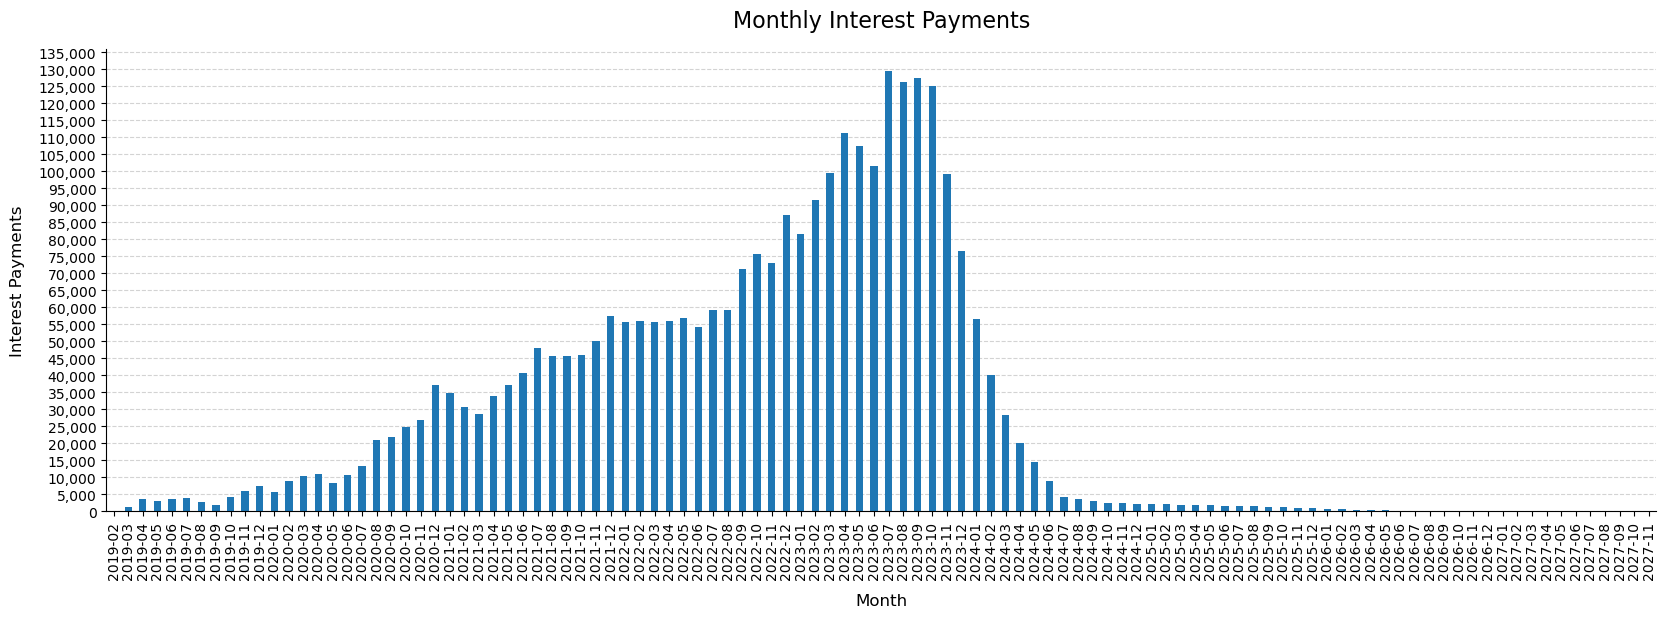

In [576]:
generate_plot(ylabel="Interest Payments", title="Monthly Interest Payments", df = df, yaxis_spacing=5_000)

In [ ]:
df_existing_loans_disbursements = existing_loans[['disbursement_date', 'loan_amount']]


In [586]:
df3 = existing_loans.groupby(existing_loans.disbursement_date.dt.to_period("M")).sum(numeric_only=True)
df3['loan_amount']

disbursement_date
2019-01     2,302.33
2019-02    12,440.15
2019-03    27,610.08
2019-04     7,054.32
2019-05    17,600.83
2019-06    12,822.65
2019-09    37,000.00
2019-10    25,000.00
2019-11    27,530.00
2019-12    10,706.00
2020-01    44,165.00
2020-02    34,700.00
2020-03    31,047.00
2020-05    50,411.84
2020-06    56,700.00
2020-07   205,423.10
2020-08    67,916.00
2020-09    83,611.14
2020-10    79,175.00
2020-11   175,344.27
2020-12    74,639.39
2021-01    63,370.00
2021-02    70,795.00
2021-03   239,741.00
2021-04   167,700.00
2021-05   138,219.25
2021-06   180,113.00
2021-07   109,258.00
2021-08   125,468.00
2021-09   137,710.00
2021-10   393,133.00
2021-11   238,320.00
2021-12   124,247.00
2022-01   216,830.00
2022-02   206,008.00
2022-03   178,179.00
2022-04   193,913.00
2022-05   160,693.50
2022-06   329,029.65
2022-07   532,852.98
2022-08   491,948.94
2022-09   289,791.73
2022-10   235,548.63
2022-11   462,033.83
2022-12   206,178.75
2023-01   381,203.89
2023-02   357,25

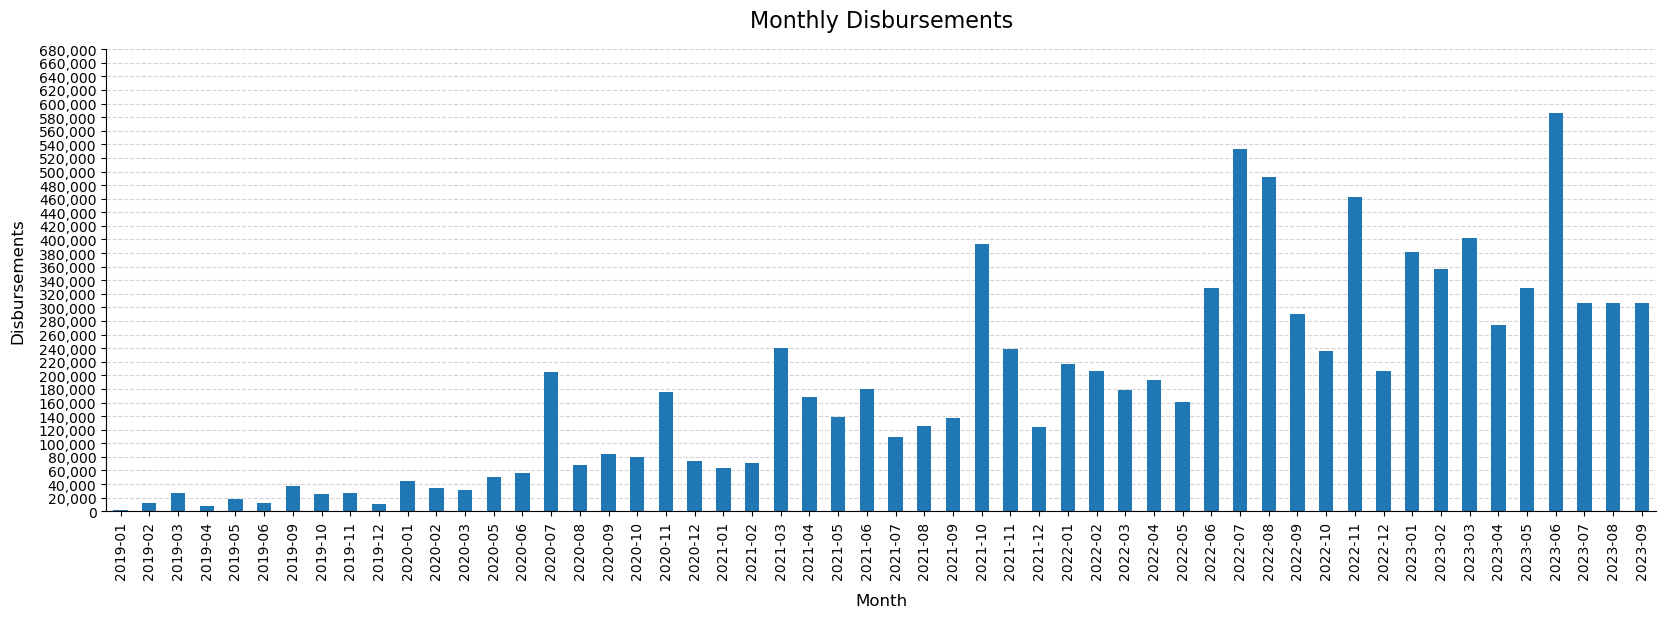

In [587]:
monthly_disbursements_axis = generate_plot(ylabel="Disbursements", title="Monthly Disbursements", df = df3['loan_amount'], yaxis_spacing=20_000)

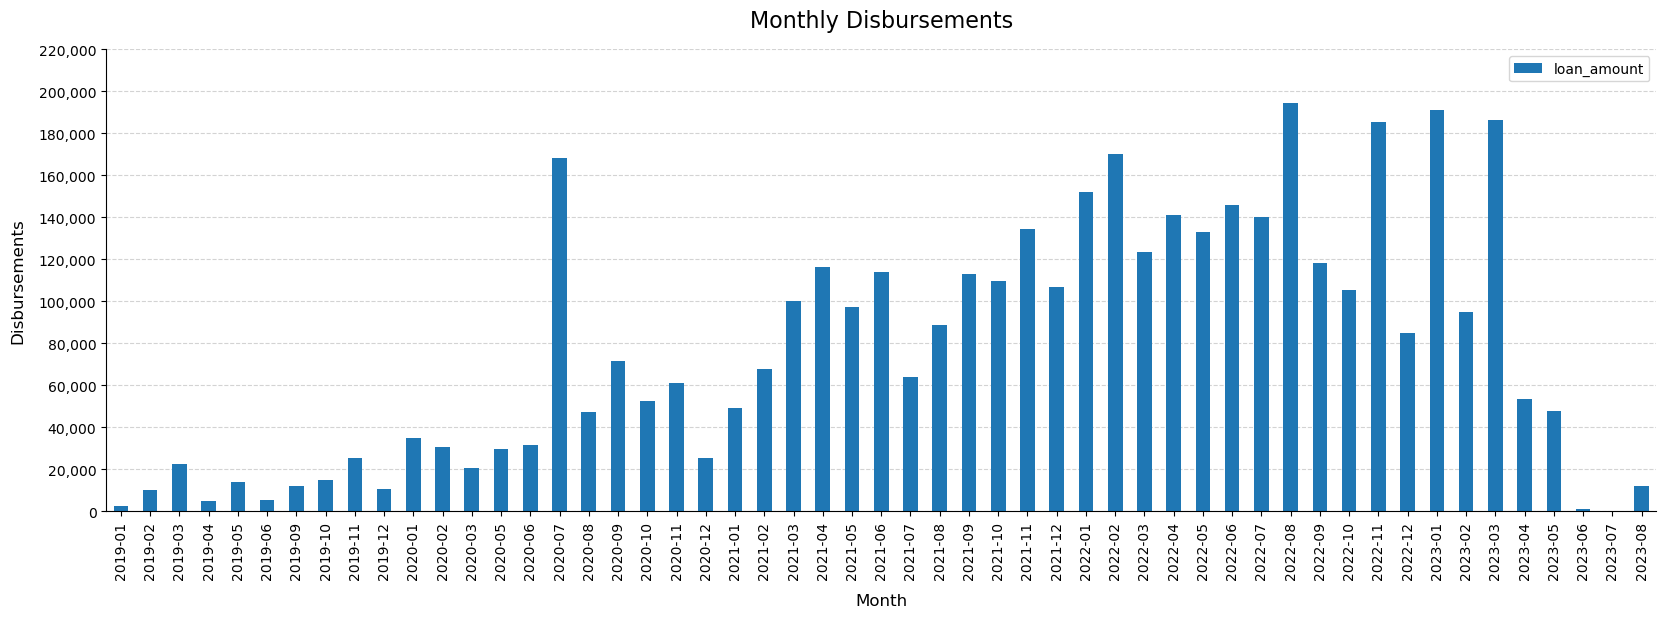

In [581]:
df2 = df_existing_loans_disbursements.groupby(df_existing_loans_disbursements.disbursement_date.dt.to_period("M")).sum(numeric_only=True)
monthly_disbursements_axis = generate_plot(ylabel="Disbursements", title="Monthly Disbursements", df = df2, yaxis_spacing=20_000)

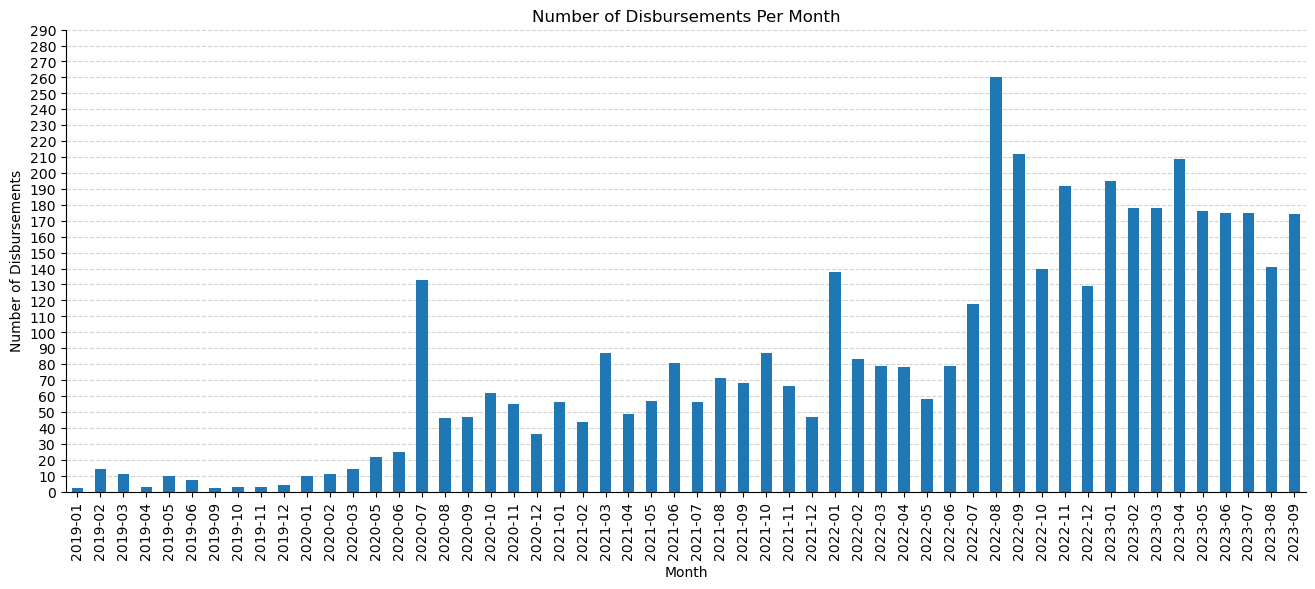

In [580]:
monthly_disbursements = existing_loans.disbursement_date.dt.to_period("M").value_counts().sort_index()
fig, ax = plt.subplots(figsize = (16,6))
monthly_disbursements.plot.bar(ax = ax, zorder  = 2, title = 'Number of Disbursements Per Month', ylabel = 'Number of Disbursements', xlabel = 'Month')
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.grid(True, linestyle = "dashed", color = 'lightgrey')
ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1], 10))

plt.show()

In [145]:
new_loans_disbursement = new_disbursements_df['total']
new_loans_disbursement.index = pd.PeriodIndex(new_loans_disbursement.index, freq = "M")

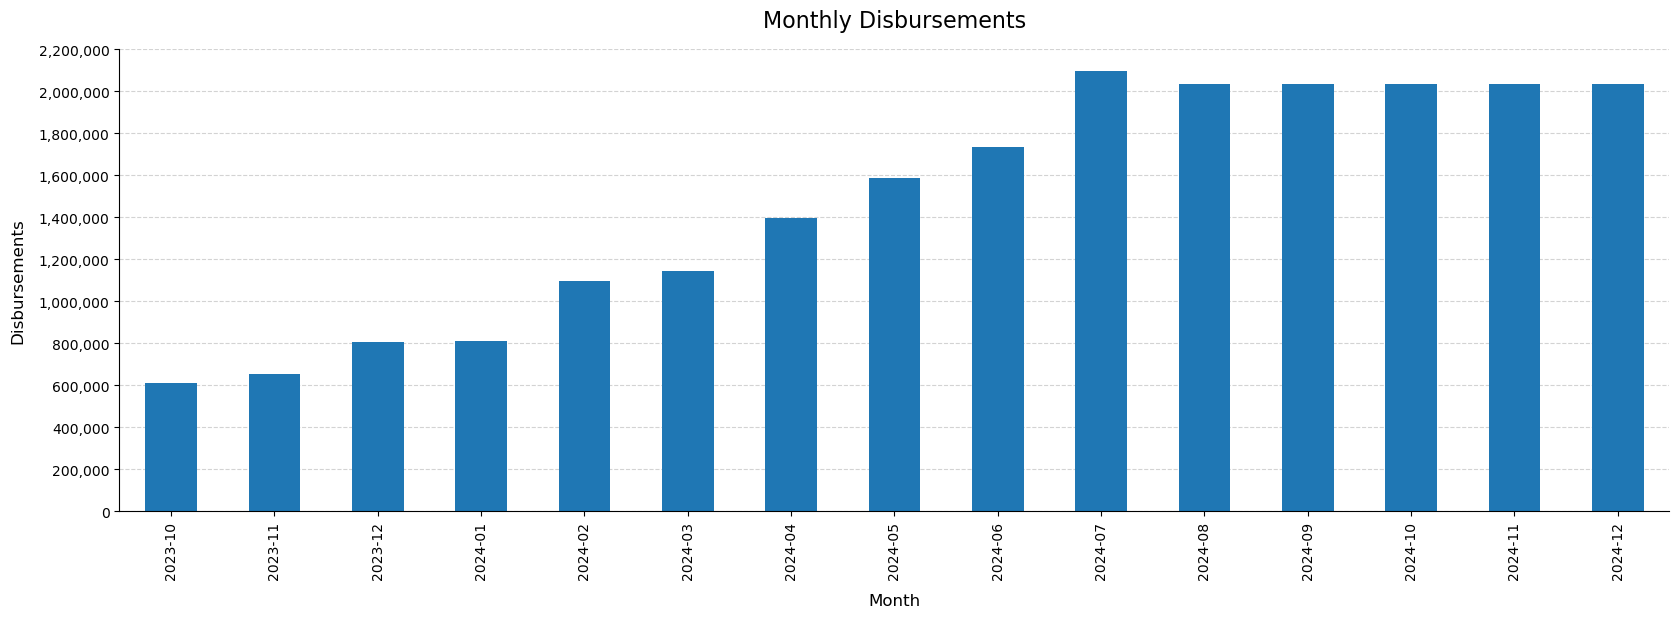

In [151]:
generate_plot(ylabel="Disbursements", title="Monthly Disbursements", df = new_loans_disbursement, yaxis_spacing=200_000)

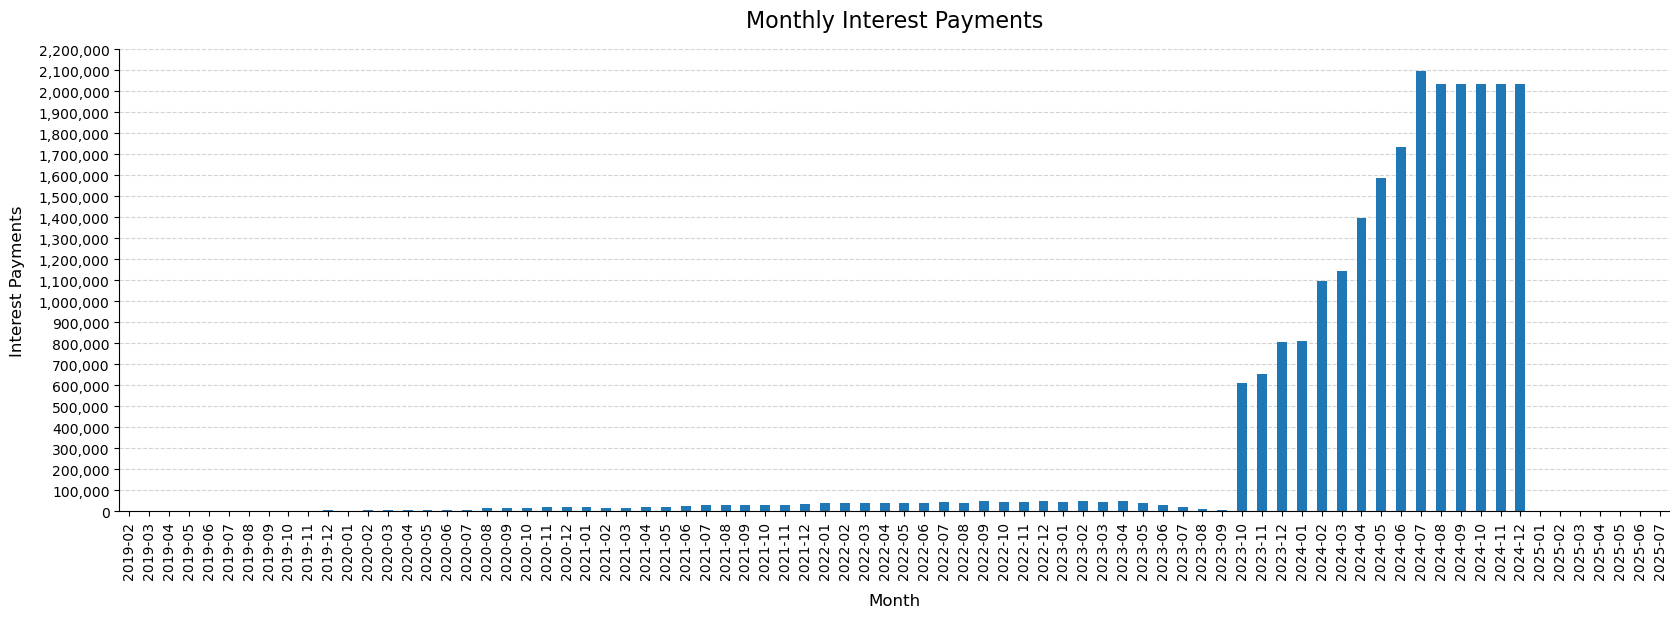

In [152]:
generate_plot(
    ylabel="Interest Payments",
    title="Monthly Interest Payments",
    df=pd.concat([df, new_loans_disbursement]).groupby(level=0).sum(),
    yaxis_spacing=100_000,
)


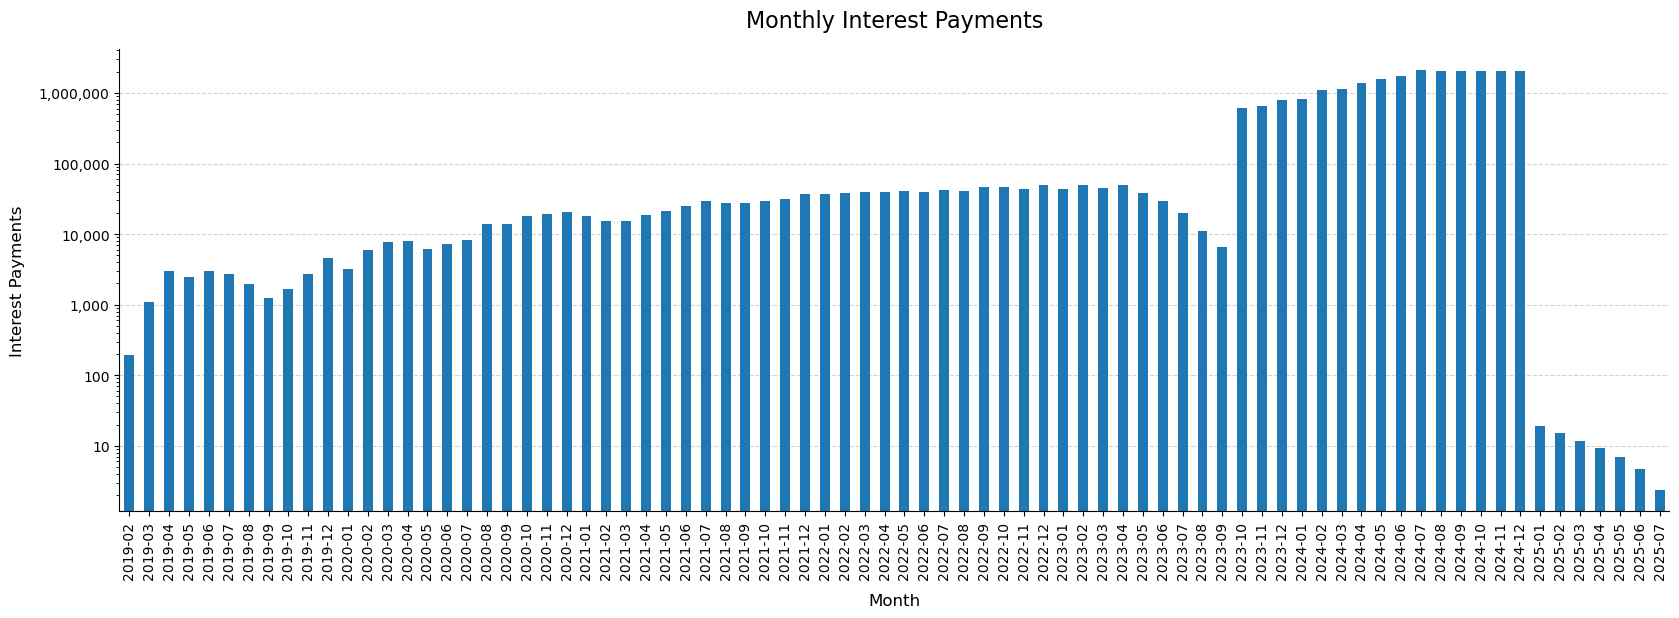

In [150]:
fig, ax = plt.subplots(figsize = (20,6))
pd.concat([df, new_loans_disbursement]).groupby(level=0).sum().plot.bar(ax = ax, ylabel="Interest Payments",
title="Monthly Interest Payments", xlabel = "Month", zorder = 2)
ax.set_title(ax.get_title(), fontdict={'fontsize': 16},pad=16)
ax.set_ylabel(ax.get_ylabel(), fontdict={'fontsize': 12}, labelpad=10)
ax.set_xlabel(ax.get_xlabel(), fontdict={'fontsize': 12}, labelpad=10)
ax.yaxis.grid(True, linestyle = "dashed", color = 'lightgrey')
ax.set_yscale("log")
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x))
plt.show()

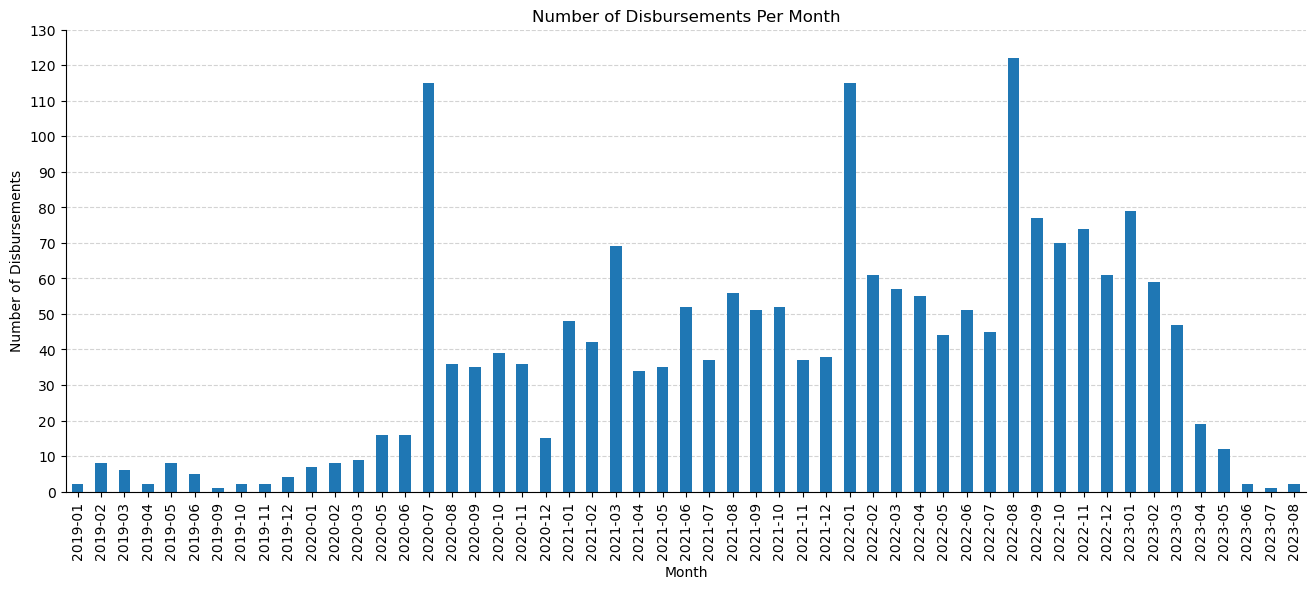

### **Graph Summaries**

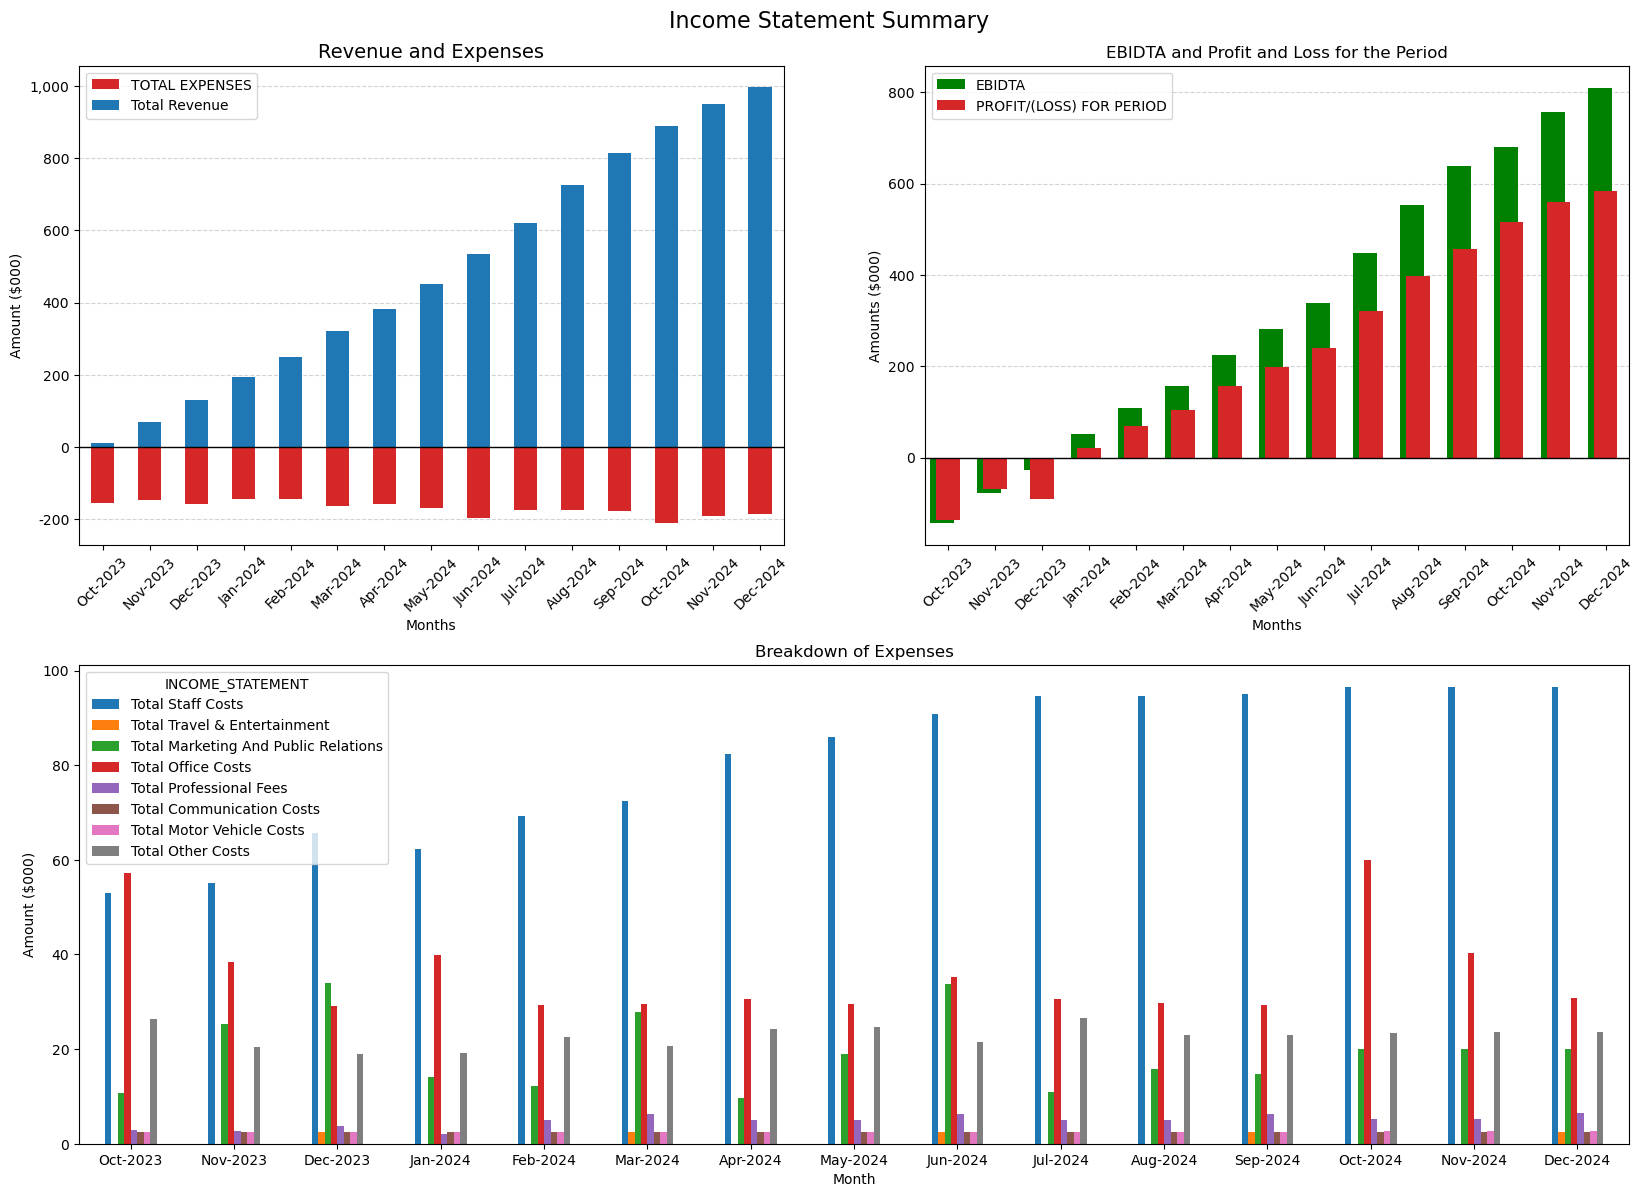

In [170]:
fig = plt.figure(figsize=(20, 14))
fig.suptitle("Income Statement Summary", fontsize=16, y = 0.92)

gs = GridSpec(2,2, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])

(-income_statement_df.loc["TOTAL EXPENSES"]).plot.bar(
    ax=ax0,
    title="Revenue and Expenses",
    color="tab:red",
    xlabel="Months",
    ylabel="Amount ($000)",
    zorder=2,
)
income_statement_df.loc["Total Revenue"].plot.bar(ax=ax0, zorder=2)
ax0.set_title(ax0.get_title(), fontdict={"fontsize": 14})
ax0.axhline(y=0, color="#030303", linewidth=1)
ax0.yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax0.yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax0.tick_params("x", rotation=45)
ax0.legend()

income_statement_df.loc["EBIDTA"].plot.bar(
    ax=ax1,
    color="green",
    position=0.75,
    zorder=2,
    title="EBIDTA and Profit and Loss for the Period",
    xlabel = "Months", 
    ylabel = "Amounts ($000)"
)
income_statement_df.loc["PROFIT/(LOSS) FOR PERIOD"].plot.bar(
    ax=ax1, color="tab:red", zorder=2
)
ax1.yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax1.yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax1.tick_params("x", rotation=45)
ax1.legend()
ax1.axhline(y=0, color="#030303", linewidth=1)


total_expenses = ['Total Staff Costs', 'Total Travel & Entertainment',
       'Total Marketing And Public Relations', 'Total Office Costs',
       'Total Professional Fees', 'Total Communication Costs',
       'Total Motor Vehicle Costs', 'Total Other Costs'],

income_statement_df.loc[total_expenses].T.plot.bar(ax = ax2, title = "Breakdown of Expenses", ylabel = "Amount ($000)", xlabel = "Month")
ax2.yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x*1e-3))
ax2.tick_params('x', rotation = 360)

plt.show()

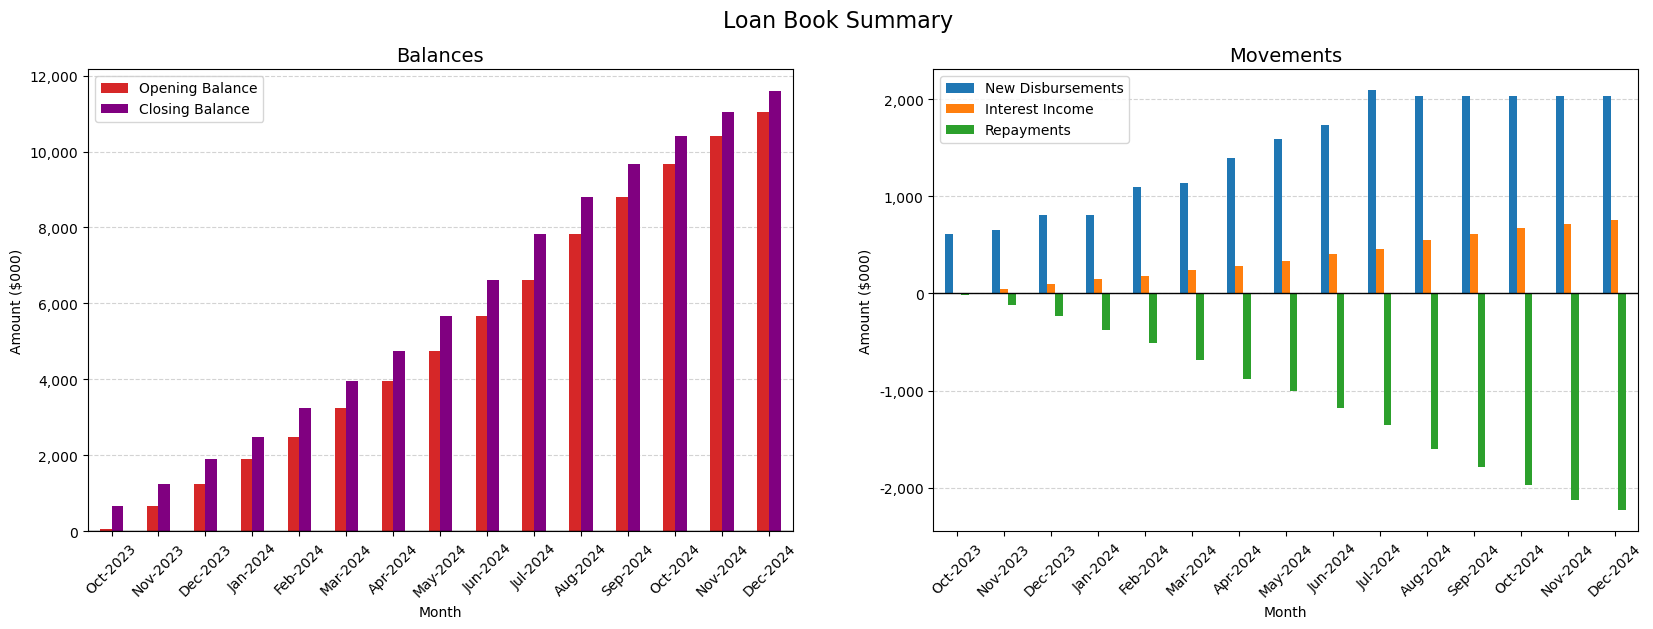

In [151]:
fig, ax = plt.subplots(figsize=(20, 6), ncols=2)
loan_book_df.loc[
    [
        "Opening Balance",
        "Closing Balance",
    ]
].T.plot.bar(
    ax=ax[0],
    title="Balances",
    xlabel="Month",
    ylabel="Amount ($000)",
    zorder=2,
    color=["tab:red", "purple"],
)
ax[0].set_title(ax[0].get_title(), fontdict={"fontsize": 14})
ax[0].axhline(y=0, color="#030303", linewidth=1)
ax[0].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[0].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[0].tick_params("x", rotation=45)
ax[0].legend()
loan_book_df.loc[
    [
        "New Disbursements",
        "Interest Income",
        "Repayments",
    ]
].T.plot.bar(
    ax=ax[1], title="Movements", xlabel="Month", ylabel="Amount ($000)", zorder=2
)
ax[1].set_title(ax[1].get_title(), fontdict={"fontsize": 14})
ax[1].axhline(y=0, color="#030303", linewidth=1)
ax[1].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[1].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[1].tick_params("x", rotation=45)
ax[1].legend()
fig.suptitle("Loan Book Summary", size=16)
plt.show()

In [158]:
income_statement_df.T.to_json(r"C:\Users\HP\Desktop\income_statement.json",orient = 'table')

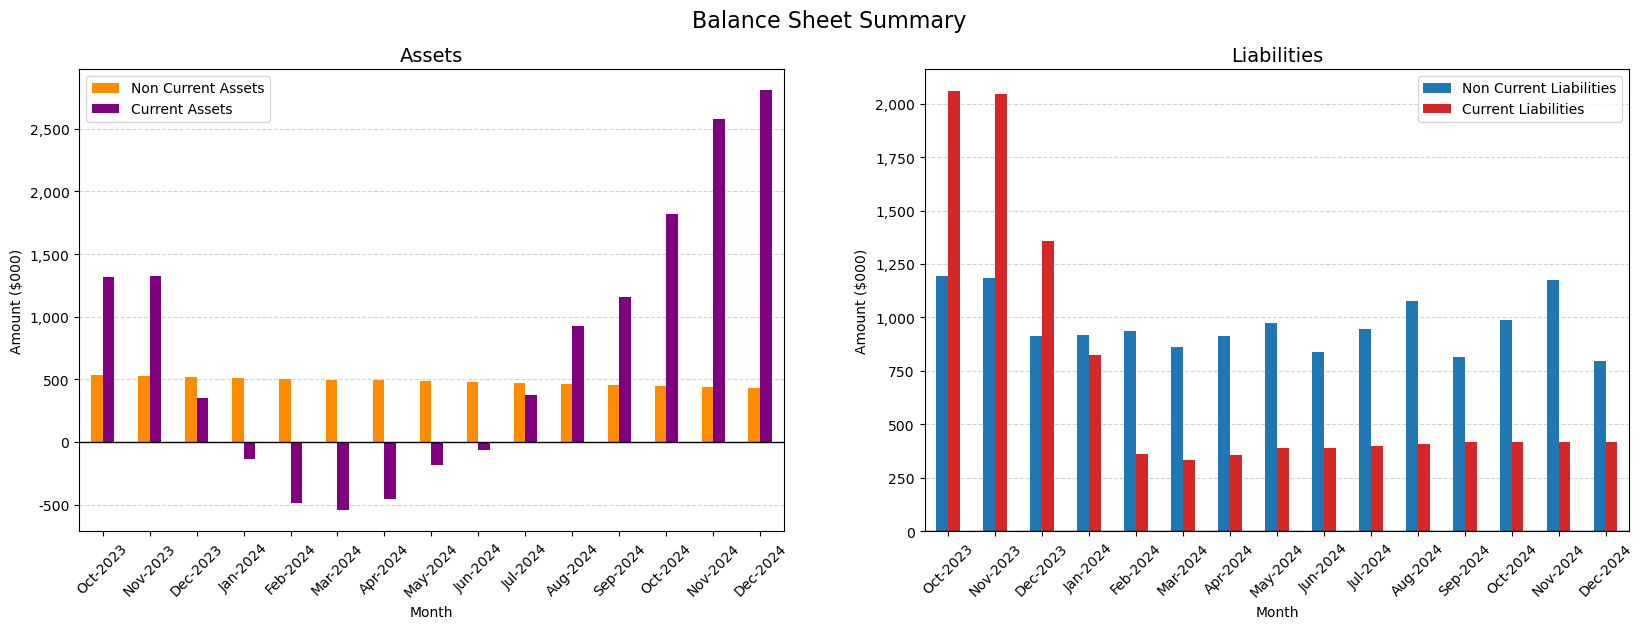

In [158]:
fig, ax = plt.subplots(figsize=(20, 6), ncols=2)
balance_sheet_df.loc[["Non Current Assets", "Current Assets"]].T.plot.bar(
    ax=ax[0], title="Assets", xlabel="Month", ylabel="Amount ($000)", zorder=2, color= [ 'darkorange', "purple"]
)
ax[0].set_title(ax[0].get_title(), fontdict={"fontsize": 14})
ax[0].axhline(y=0, color="#030303", linewidth=1)
ax[0].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[0].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[0].tick_params("x", rotation=45)
ax[0].legend()

balance_sheet_df.loc[["Non Current Liabilities", "Current Liabilities"]].T.plot.bar(
    ax=ax[1], title="Liabilities", xlabel="Month", ylabel="Amount ($000)", zorder=2, color = ['tab:blue', "tab:red"]
)

ax[1].set_title(ax[1].get_title(), fontdict={"fontsize": 14})
ax[1].axhline(y=0, color="#030303", linewidth=1)
ax[1].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[1].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[1].tick_params("x", rotation=45)
ax[1].legend()
fig.suptitle("Balance Sheet Summary", size=16)
plt.show()

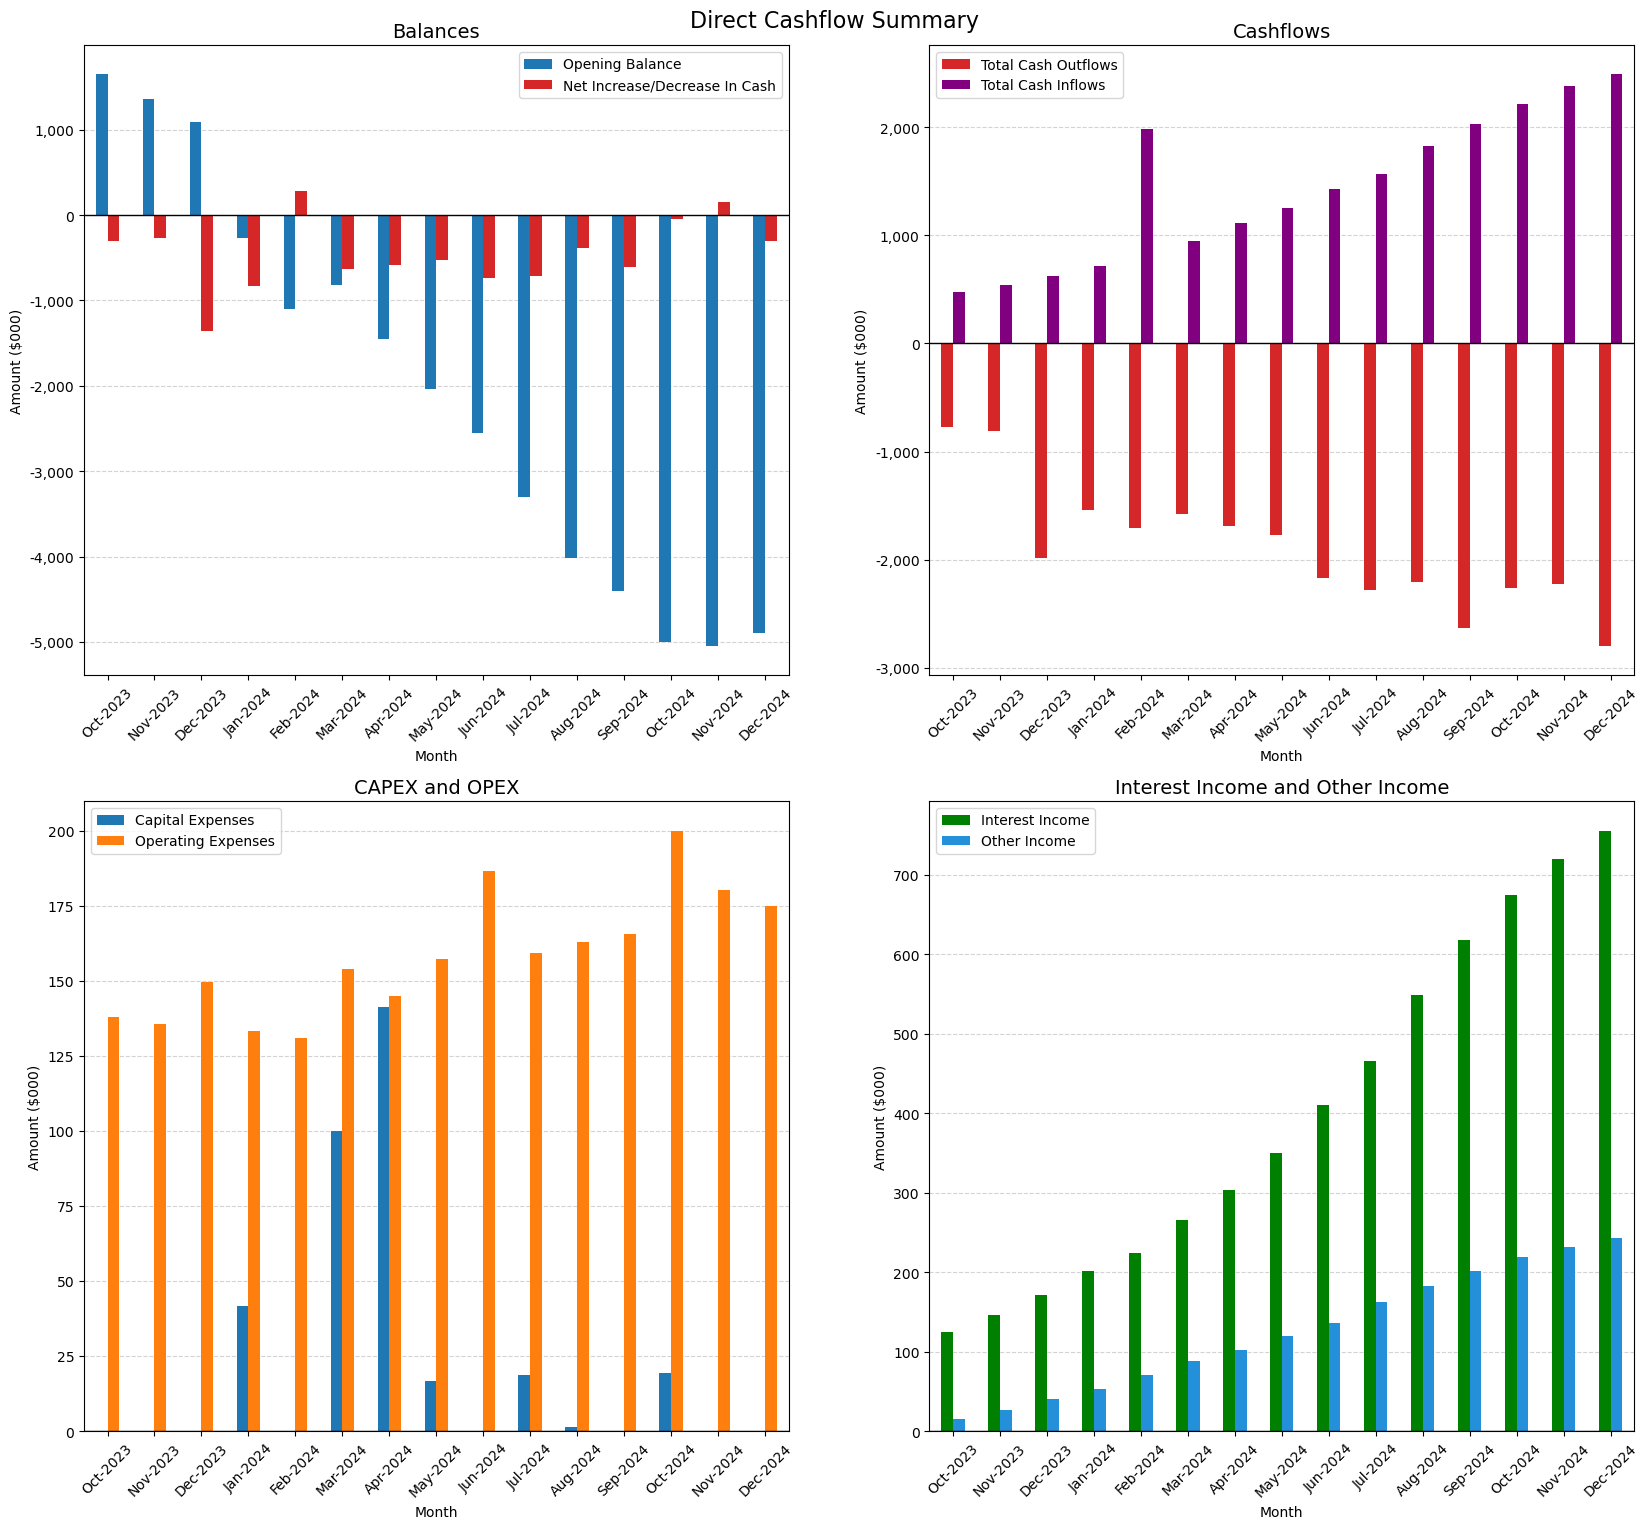

In [589]:
fig, ax = plt.subplots(figsize=(20, 18), ncols=2, nrows=2)
fig.suptitle("Direct Cashflow Summary", size=16, y = 0.90 , x = 0.5)

direct_cashflow_df.loc[
    ["Opening Balance" ,"Net Increase/Decrease In Cash"]
].T.plot.bar(
    ax=ax[0, 0],
    title="Balances",
    xlabel="Month",
    ylabel="Amount ($000)",
    zorder=2,
    color = ['tab:blue', "tab:red"]

)
ax[0, 0].set_title(ax[0, 0].get_title(), fontdict={"fontsize": 14})
ax[0, 0].axhline(y=0, color="#030303", linewidth=1)
ax[0, 0].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[0, 0].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[0, 0].tick_params("x", rotation=45)
ax[0, 0].legend()

direct_cashflow_df.loc[["Total Cash Outflows", "Total Cash Inflows"]].T.plot.bar(
    ax=ax[0, 1],
    title="Cashflows",
    xlabel="Month",
    ylabel="Amount ($000)",
    zorder=2,
    color=["tab:red", "purple"],
)

ax[0, 1].set_title(ax[0, 1].get_title(), fontdict={"fontsize": 14})
ax[0, 1].axhline(y=0, color="#030303", linewidth=1)
ax[0, 1].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[0, 1].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[0, 1].tick_params("x", rotation=45)
ax[0, 1].legend()


(-1 * direct_cashflow_df.loc[["Capital Expenses", "Operating Expenses"]]).T.plot.bar(
    ax=ax[1, 0],
    title="CAPEX and OPEX",
    xlabel="Month",
    ylabel="Amount ($000)",
    zorder=2,
)

ax[1, 0].set_title(ax[1, 0].get_title(), fontdict={"fontsize": 14})
ax[1, 0].axhline(y=0, color="#030303", linewidth=1)
ax[1, 0].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[1, 0].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[1, 0].tick_params("x", rotation=45)
ax[1, 0].legend()

(direct_cashflow_df.loc[["Interest Income", "Other Income"]]).T.plot.bar(
    title="Interest Income and Other Income",
    xlabel="Month",
    ylabel="Amount ($000)",
    zorder=2,
    ax=ax[1, 1],
    color = ['green', "#2590da"]
)

ax[1, 1].set_title(ax[1, 1].get_title(), fontdict={"fontsize": 14})
ax[1, 1].axhline(y=0, color="#030303", linewidth=1)
ax[1, 1].yaxis.grid(True, color="lightgrey", linestyle="dashed")
ax[1, 1].yaxis.set_major_formatter(lambda x, p: "{:,.0f}".format(x * 1e-3))
ax[1, 1].tick_params("x", rotation=45)
ax[1, 1].legend()

plt.show()

### **Ratios**

In [632]:
ratios = pd.DataFrame(
    columns=helper.generate_columns(start_date=start_date, period=months_to_forecast),
    index=[
        "Gross Interest Income",
        "Interest Expense",
        "Management Expenses",
        "PBT",
        "Loan Book",
        "Disbursements",
        "Average Loan Size",
        "Client Count",
        "Operational Self Sufficiency",
    ],
)

ratios.loc['Gross Interest Income'] = income_statement_df.loc['Interest Income']
ratios.loc['Interest Expense'] = income_statement_df.loc['Finance Costs']
ratios.loc['Management Expenses'] = income_statement_df.loc['TOTAL EXPENSES']
ratios.loc['PBT'] = income_statement_df.loc["PROFIT / (LOSS) BEFORE TAX"]
ratios.loc['Loan Book'] = loan_book_df.loc['Closing Balance']
ratios.loc['Disbursements'] = loan_book_df.loc['New Disbursements']
ratios.loc['Operational Self Sufficiency'] = income_statement_df.loc['Total Revenue']/(
    income_statement_df.loc["Finance Costs"]
    + balance_sheet_df.loc["Provisions"]
    + -direct_cashflow_df.loc["Operating Expenses"]
)

ratios

,Oct-2023,Nov-2023,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024,Oct-2024,Nov-2024,Dec-2024
Gross Interest Income,"125,108.74","146,562.64","171,177.56","202,040.33","224,757.36","265,381.05","303,324.24","350,611.78","410,623.76","465,764.61","549,299.34","617,895.78","674,650.71","720,244.40","755,371.26"
Interest Expense,"23,645.54","3,354.82","52,555.32","23,522.55","3,230.99","7,989.15","3,147.03","3,104.62","5,461.92","3,018.92","2,975.64","5,332.05","2,888.17","2,843.99","5,199.50"
Management Expenses,"155,323.19","146,829.23","158,571.00","142,389.63","143,040.42","164,304.46","156,717.54","169,168.94","195,107.67","172,964.80","173,253.04","175,853.71","210,161.27","190,636.90","184,969.59"
PBT,-194.56,"42,869.02","11,056.67","110,180.71","159,293.78","192,338.33","257,200.45","308,279.52","362,705.29","463,428.10","566,034.90","648,974.10","720,716.19","778,787.34","819,247.48"
Loan Book,"2,597,597.54","2,882,481.81","3,274,063.08","3,624,742.61","4,221,589.19","4,770,450.48","5,461,558.67","6,268,437.50","7,125,889.74","8,281,143.29","9,223,629.36","10,049,309.41","10,762,120.89","11,370,006.32","11,908,467.22"
Disbursements,"609,011.05","651,480.25","805,080.25","808,900.00","1,097,573.00","1,141,909.25","1,396,650.00","1,588,680.00","1,735,000.00","2,095,000.00","2,035,000.00","2,035,000.00","2,035,000.00","2,035,000.00","2,035,000.00"
Average Loan Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Client Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operational Self Sufficiency,0.83,1.18,1.01,1.56,2.06,2.06,2.54,2.71,2.69,3.55,4.05,4.41,4.11,4.80,5.13
